# **ABSTRACT**

In today's dynamic financial landscape, where access to credit is pivotal for economic growth, financial institutions are increasingly relying on data-driven approaches to assess creditworthiness. The dataset comprises a comprehensive collection of banking information and credit-related metrics gathered over time. This dataset serves as the foundation for developing a robust machine learning model aimed at automating the classification of individuals into distinct credit score brackets: poor, standard, and good. By leveraging various features such as annual income, credit history, debt-to-income ratio, and more, our classification model aims to streamline the credit assessment process, enabling efficient and informed decision-making within the global finance company.


Data contains a person’s credit-related information.

Data source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

Data size: 31 MB (10 MB archived)

Data contains 100000 rows × 28 columns.


# **1. ML Data Cleaning and feature selection**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

# Setting the maximum number of rows displayed when printing a DataFrame to 500
pd.set_option('display.max_rows', 500)

In [2]:
# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/tanv99/INFO6105/main/train.csv')

<ipython-input-2-27cdf1e7f117>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/tanv99/INFO6105/main/train.csv')


## What are the data types?

In [3]:
# Viewing data
#print total number of columns and rows present in the dataset
print('The Dataset has', df.shape[0], 'rows and', df.shape[1],'columns')
df.info()

The Dataset has 100000 rows and 28 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Ty

## Do the training and test sets have the same data?

In [4]:

# FINDING UNIQUE ROWS FROM TRAIN AND TEST DATA

from sklearn.model_selection import train_test_split

 # Assuming 'Credit_Score' is the target column
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if the training and test sets have the same data
train_set_unique = set(X_train.apply(tuple, axis=1))
test_set_unique = set(X_test.apply(tuple, axis=1))

# Identify unique rows in training set not present in test set
unique_train_not_test = train_set_unique - test_set_unique

# Identify unique rows in test set not present in training set
unique_test_not_train = test_set_unique - train_set_unique

print("Unique rows in training set not in test set:", len(unique_train_not_test))
print("Unique rows in test set not in training set:", len(unique_test_not_train))

Unique rows in training set not in test set: 80000
Unique rows in test set not in training set: 20000


## EDA

In [5]:
# deleting unnecessary columns

df = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1)

In [6]:
# Iterate through DataFrame columns and print unique values for object-type columns

for col in df.columns:
  if df[col].dtype != "object":
    continue
  # Display unique values for the current object-type column
  print(f"Unique Values of {col}")
  print(df[col].unique())
  print("==================================================")

Unique Values of Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'

In [7]:
# Fixing data types for columns

df['Age'] = pd.to_numeric(df['Age'].replace('_', ''), errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'].replace('_', ''), errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'].replace('_', ''), errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'].replace('_', ''), errors='coerce')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'].replace('_', ''), errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].replace('_', ''), errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'].replace('_', ''), errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'].replace('_', ''), errors='coerce')


In [8]:
# Convert Credit History Age to number of months

def convert_credit_history_age_to_months(credit_history_age):
  if pd.isna(credit_history_age):
    return np.nan
  years, _, _, months, _ = credit_history_age.split(' ')
  return int(years) * 12 + int(months)

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_history_age_to_months)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       95061 non-null   float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             93020 non-null   float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               95215 non-null   float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    90254 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

## Which independent variables have missing data? How much?

In [10]:
# Getting Missing Values

df.isnull().sum()

Age                          4939
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

## Do the ranges of the predictor variables make sense?

In [11]:
# Finding Outlier Ranges

for x in df.columns:
    if (df[x].dtype != 'int64') & (df[x].dtype != 'float64'):
       continue

    q75,q25 = np.percentile(df.dropna().loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    print(x, min, max)

Age -3.0 69.0
Annual_Income -57860.065 146549.015
Monthly_Inhand_Salary -4633.230833333332 11913.162499999999
Num_Bank_Accounts -2.0 14.0
Num_Credit_Card -0.5 11.5
Interest_Rate -13.0 43.0
Num_of_Loan -4.0 12.0
Delay_from_due_date -18.5 57.5
Num_of_Delayed_Payment -6.0 34.0
Changed_Credit_Limit -9.16375 30.286250000000003
Num_Credit_Inquiries -6.0 18.0
Outstanding_Debt -1676.4800000000005 4424.800000000001
Credit_Utilization_Ratio 15.419391701091492 48.981425311092984
Credit_History_Age -103.0 529.0
Total_EMI_per_month -149.72397615896705 359.80300422590676
Amount_invested_monthly -161.2628539715279 453.89152533733596
Monthly_Balance -4.670655093433254 713.882784537763


1. The variable 'Age' shows some negative values, possibly indicating an error or outliers in the data.
2. 'Annual_Income' and 'Monthly_Inhand_Salary' have negative values, which may need further investigation as negative incomes are unusual.
3. 'Num_Bank_Accounts' and 'Num_Credit_Card' seem to have reasonable ranges with the minimum values being non-negative.
4. The 'Interest_Rate' variable shows a broad range from -13.0 to 43.0, suggesting diverse interest rates in the dataset.
5. The variable 'Num_of_Loan' has a minimum value of -4.0, indicating a potential outlier or data issue.
6. The 'Credit_History_Age' variable has a wide range
from -103.0 to 529.0, which might need scrutiny, as negative ages and extremely high ages seem unusual

In [12]:
df_with_outliers = df.copy(deep=True)

In [13]:
# Removing Outliers

df.loc[(df['Age'] < 0) | (df['Age'] > 70), 'Age'] = np.nan
df.loc[(df['Annual_Income'] < 0) | (df['Annual_Income'] > 150000), 'Annual_Income'] = np.nan
# df.loc[(df['Monthly_Inhand_Salary'] < 0) | (df['Monthly_Inhand_Salary'] > 12000), 'Monthly_Inhand_Salary'] = np.nan
df.loc[(df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > 14), 'Num_Bank_Accounts'] = np.nan
df.loc[(df['Num_Credit_Card'] < 0) | (df['Num_Credit_Card'] > 12), 'Num_Credit_Card'] = np.nan
df.loc[(df['Interest_Rate'] < 0) | (df['Interest_Rate'] > 43), 'Interest_Rate'] = np.nan
df.loc[(df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > 12), 'Num_of_Loan'] = np.nan
df.loc[(df['Delay_from_due_date'] < 0) | (df['Delay_from_due_date'] > 60), 'Delay_from_due_date'] = np.nan
df.loc[(df['Num_of_Delayed_Payment'] < 0) | (df['Num_of_Delayed_Payment'] > 35), 'Num_of_Delayed_Payment'] = np.nan
df.loc[(df['Changed_Credit_Limit'] < -10) | (df['Changed_Credit_Limit'] > 30), 'Changed_Credit_Limit'] = np.nan
df.loc[(df['Num_Credit_Inquiries'] < 0) | (df['Num_Credit_Inquiries'] > 18), 'Num_Credit_Inquiries'] = np.nan
df.loc[(df['Credit_Utilization_Ratio'] < 0) | (df['Credit_Utilization_Ratio'] > 50), 'Credit_Utilization_Ratio'] = np.nan
df.loc[(df['Credit_History_Age'] < 0) | (df['Credit_History_Age'] > 550), 'Credit_History_Age'] = np.nan
df.loc[(df['Total_EMI_per_month'] < 0) | (df['Total_EMI_per_month'] > 360), 'Total_EMI_per_month'] = np.nan
df.loc[(df['Amount_invested_monthly'] < 0) | (df['Amount_invested_monthly'] > 450), 'Amount_invested_monthly'] = np.nan
df.loc[(df['Monthly_Balance'] < 0) | (df['Monthly_Balance'] > 720), 'Monthly_Balance'] = np.nan

## What are the likely distributions of the numeric variables?

<ipython-input-14-479fefee16b0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=10)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

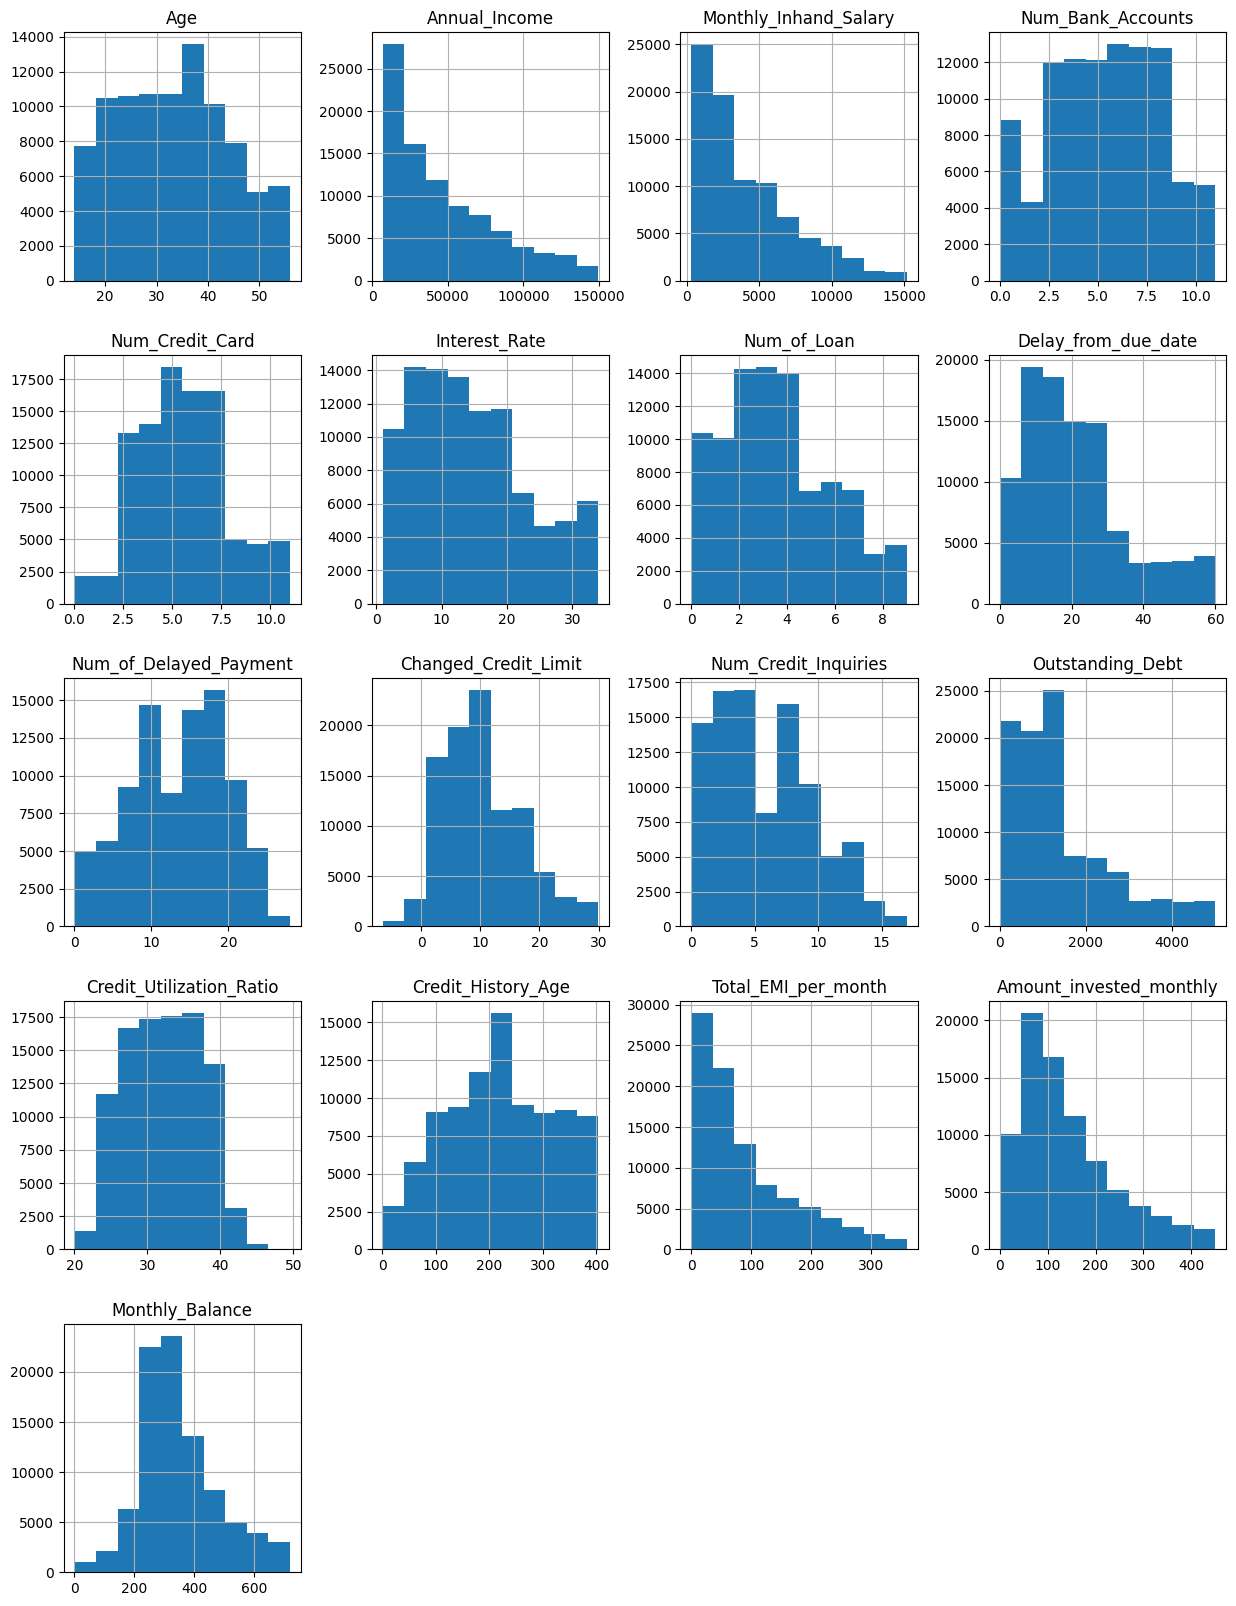

In [14]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax, bins=10)

<Figure size 800x500 with 0 Axes>

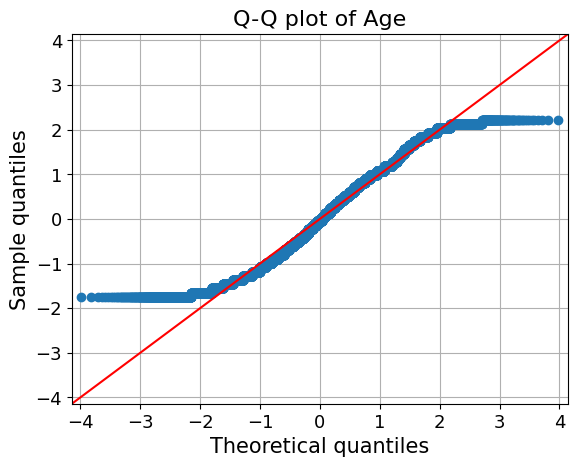

<Figure size 800x500 with 0 Axes>

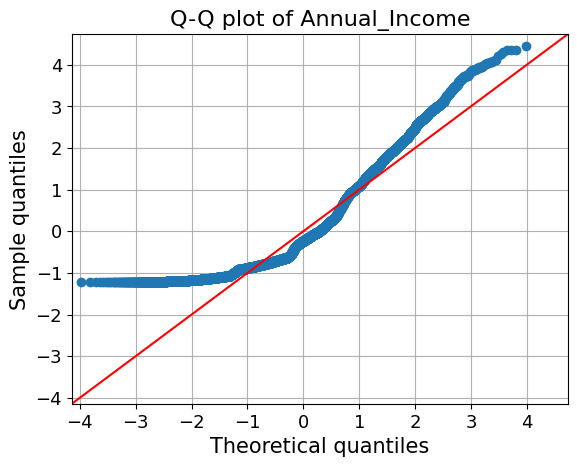

<Figure size 800x500 with 0 Axes>

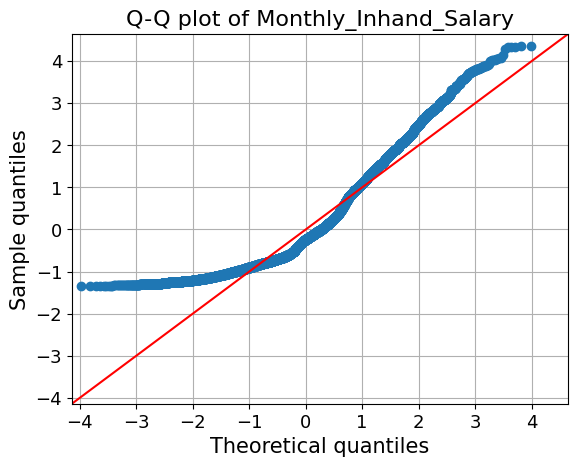

<Figure size 800x500 with 0 Axes>

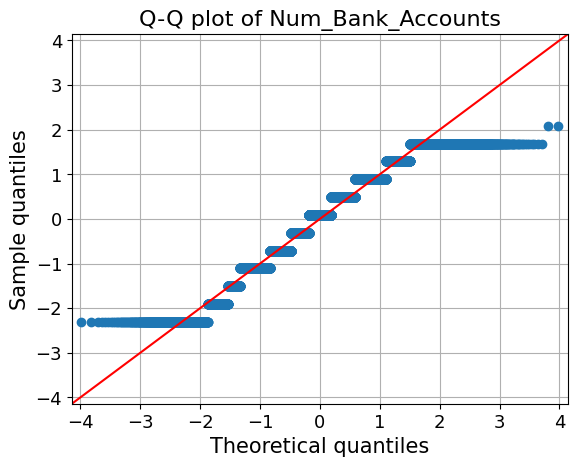

<Figure size 800x500 with 0 Axes>

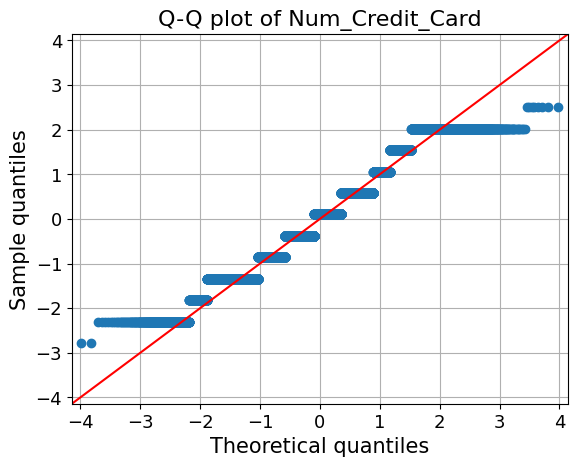

<Figure size 800x500 with 0 Axes>

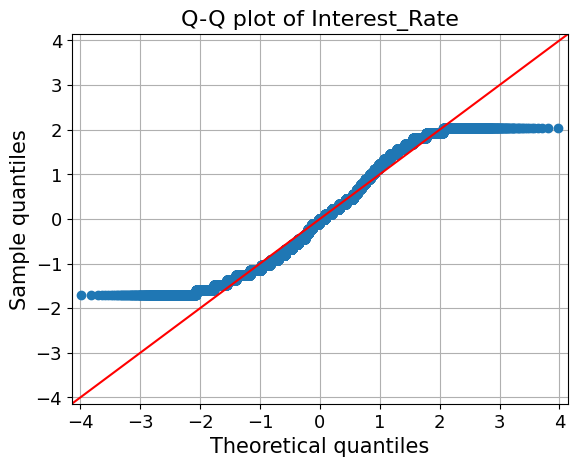

<Figure size 800x500 with 0 Axes>

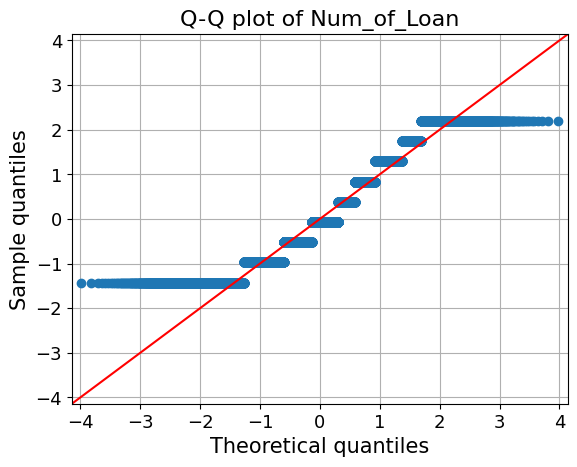

<Figure size 800x500 with 0 Axes>

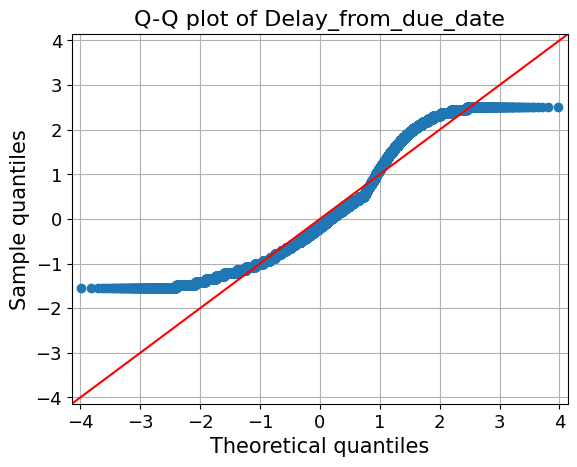

<Figure size 800x500 with 0 Axes>

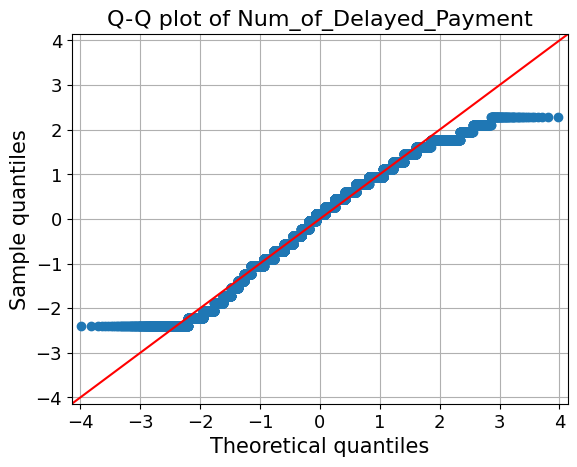

<Figure size 800x500 with 0 Axes>

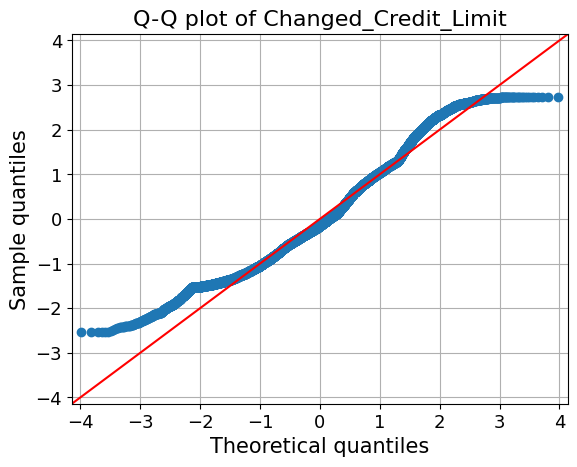

<Figure size 800x500 with 0 Axes>

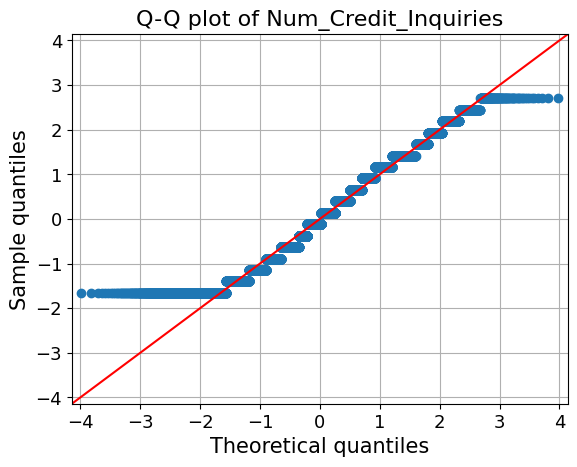

<Figure size 800x500 with 0 Axes>

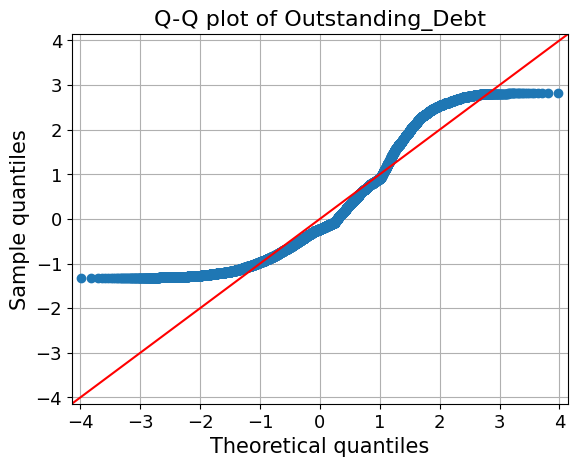

<Figure size 800x500 with 0 Axes>

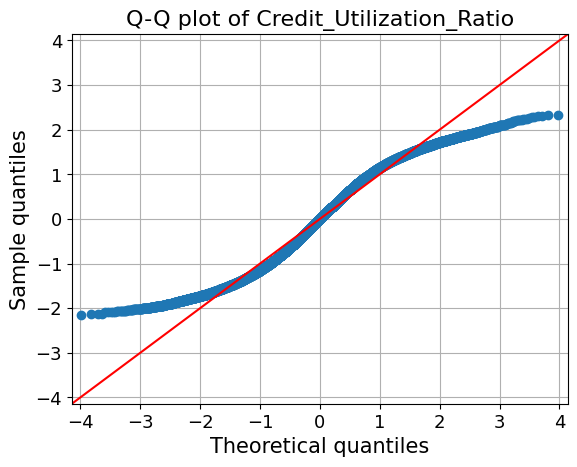

<Figure size 800x500 with 0 Axes>

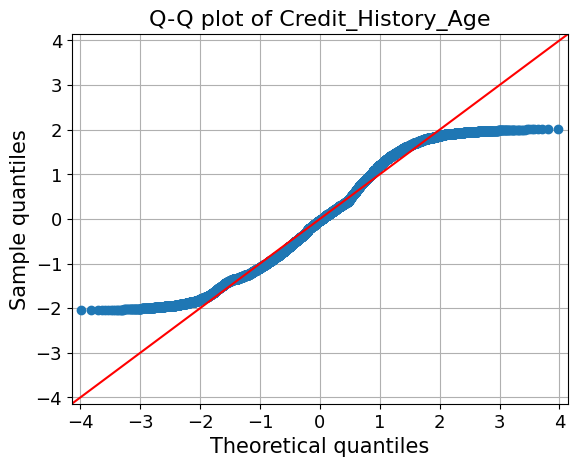

<Figure size 800x500 with 0 Axes>

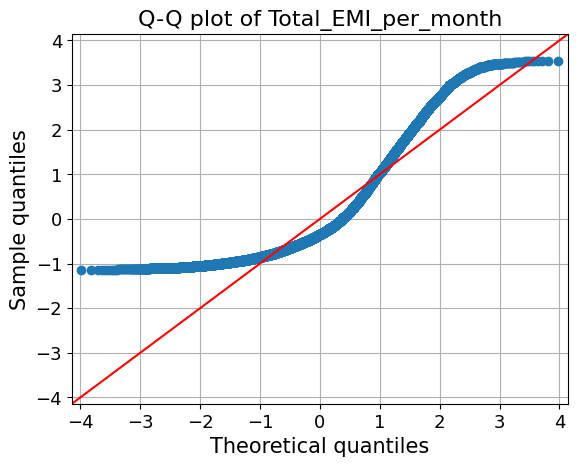

<Figure size 800x500 with 0 Axes>

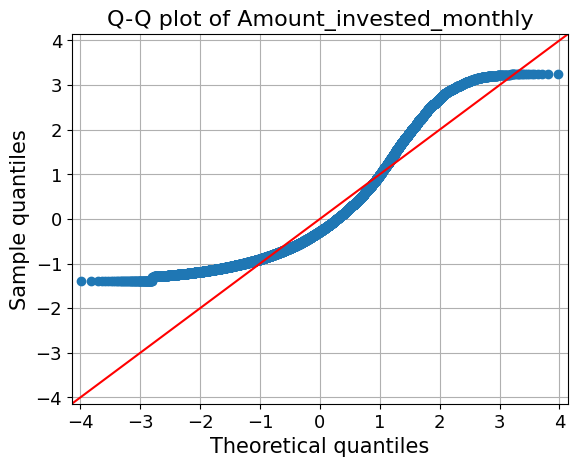

<Figure size 800x500 with 0 Axes>

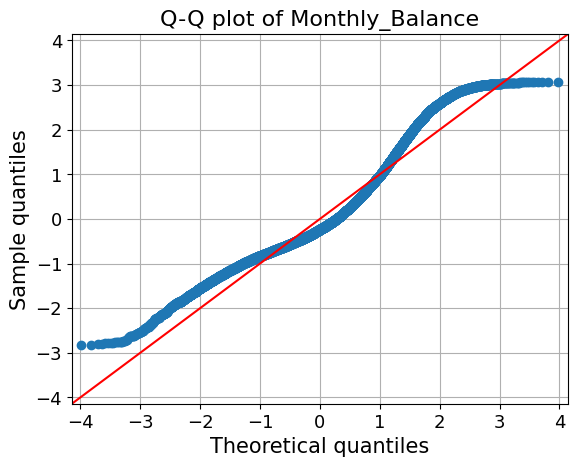

In [15]:
# Checking the distribution of independent variables using Q-Q plot
from statsmodels.graphics.gofplots import qqplot

data_norm = df.dropna()
for c in data_norm.columns:
    if (data_norm[c].dtype != 'int64') & (data_norm[c].dtype != 'float64'):
       continue
    plt.figure(figsize=(8, 5))
    data = data_norm[data_norm[c] != 0][c]
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()


After removing the outliers,the histograms depict that the variables such as Age, Annual Income, Num_Credit_Card, Num_of_Loan, Num of Delayed Payment, Num Credit Inquiries, Interest_Rate, Total EMI per month, Amount invested monthly, and Monthly Balance are heavily skewed to the right. This suggests that a majority of the data points are concentrated at the lower end of the scale for these variables. However, some variables like Monthly Inhand Salary, Credit Utilization Ratio, Changed Credit Limit, and Delay_from_due_date exhibit bimodal distributions. This indicates the presence of two distinct groups within these variables. The Credit History Age variable shows a multimodal distribution, suggesting a diverse range of credit history ages in the dataset.The “Num Bank Accounts” variable shows a left-skewed distribution, indicating that many people have more bank accounts. The “Interest Rate” variable appears to be somewhat uniformly distributed but with a significant drop after an interest rate of 2.5%. The “Monthly Balance” variable shows a normal distribution centered around a specific value

In [16]:
df.info()
# missing values increased due to removing outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       92365 non-null   float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             90235 non-null   float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         98664 non-null   float64
 5   Num_Credit_Card           97729 non-null   float64
 6   Interest_Rate             97966 non-null   float64
 7   Num_of_Loan               90892 non-null   float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       98107 non-null   float64
 10  Num_of_Delayed_Payment    88915 non-null   float64
 11  Changed_Credit_Limit      97654 non-null   float64
 12  Num_Credit_Inquiries      96385 non-null   float64
 13  Credit_Mix                100000 non-null  ob

## Which independent variables are useful to predict a target (dependent variable)?

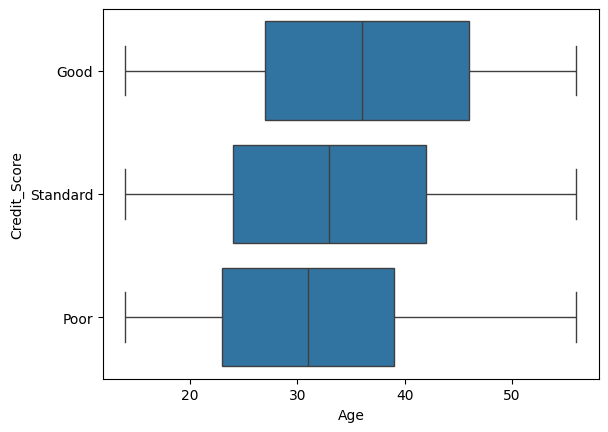

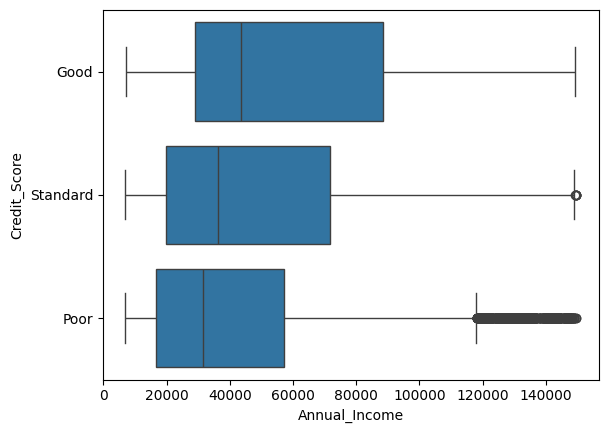

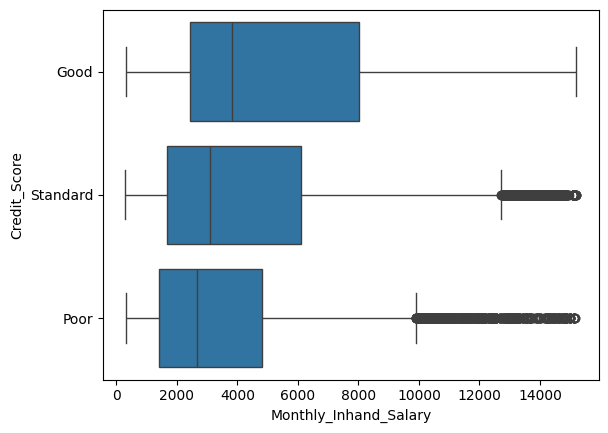

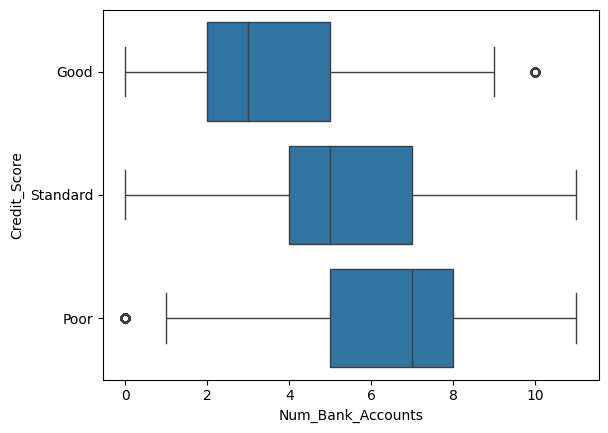

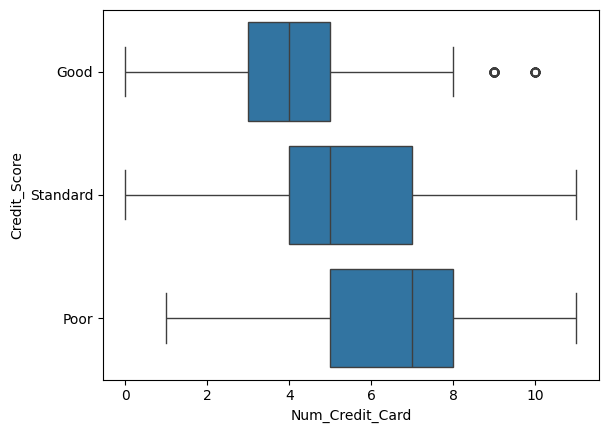

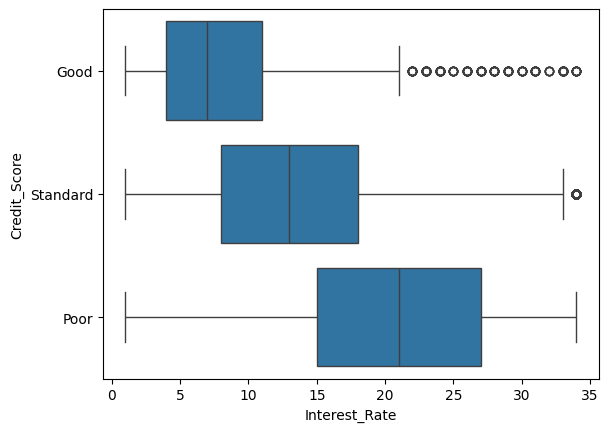

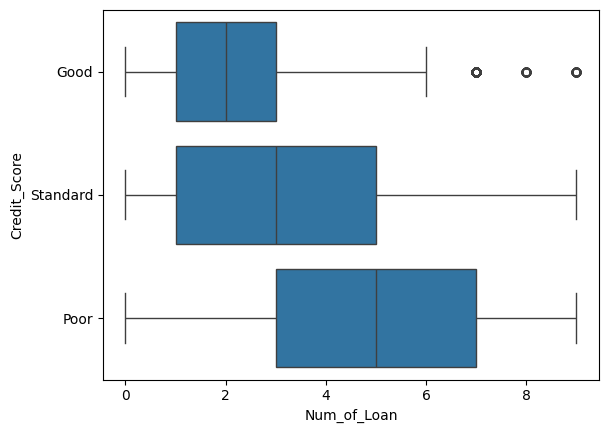

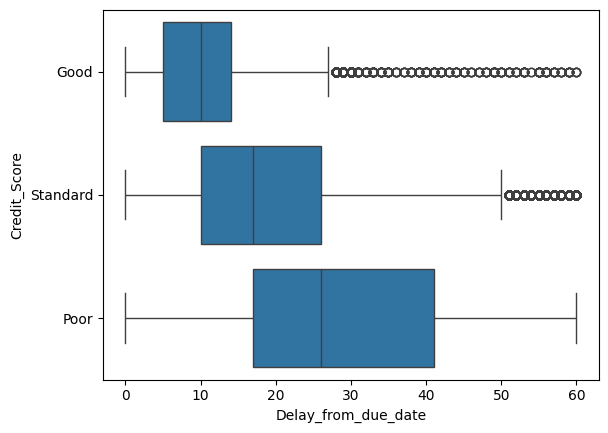

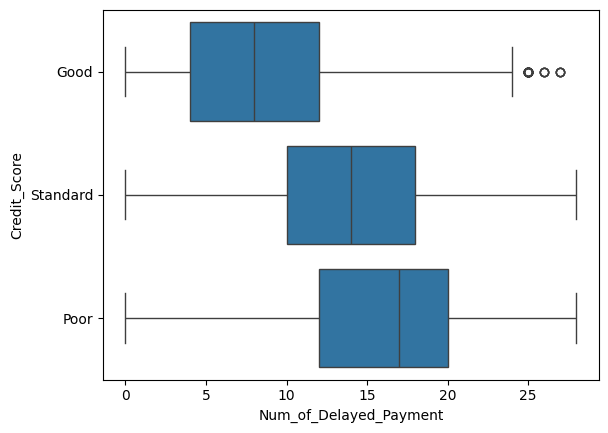

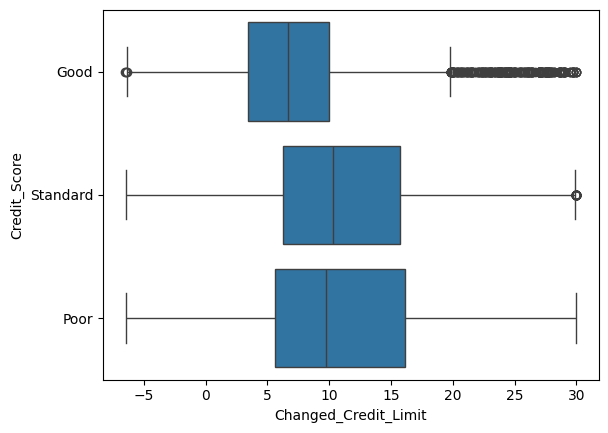

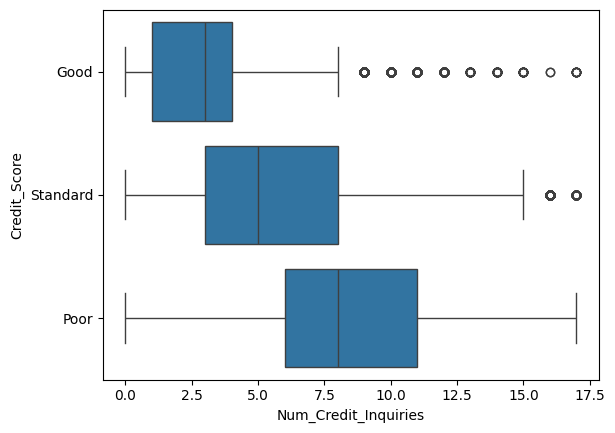

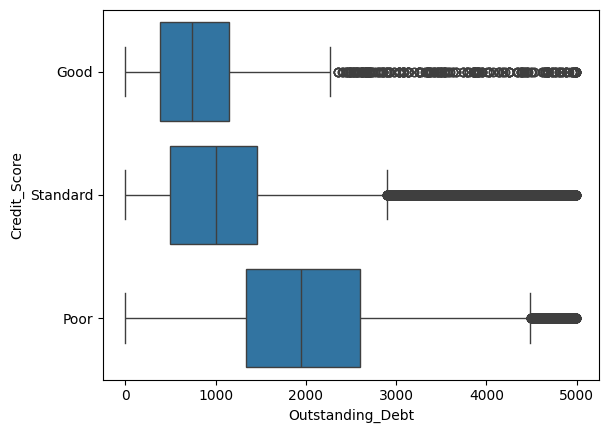

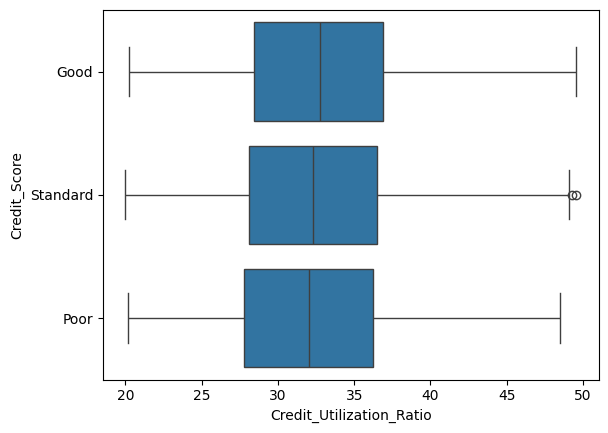

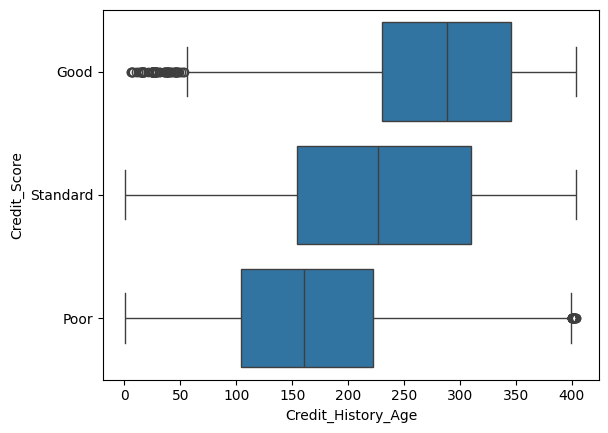

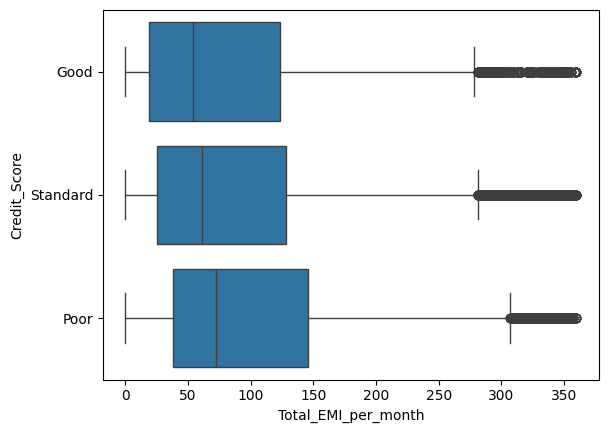

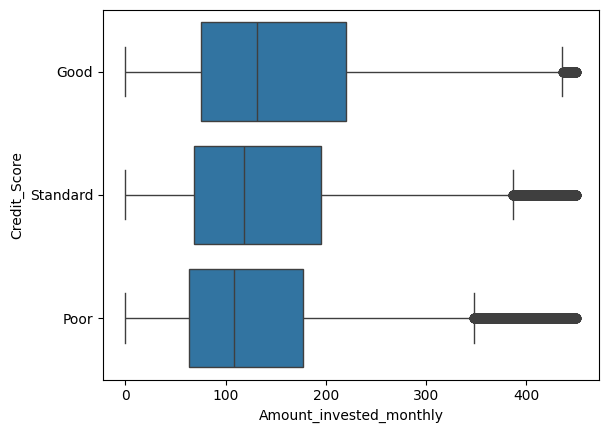

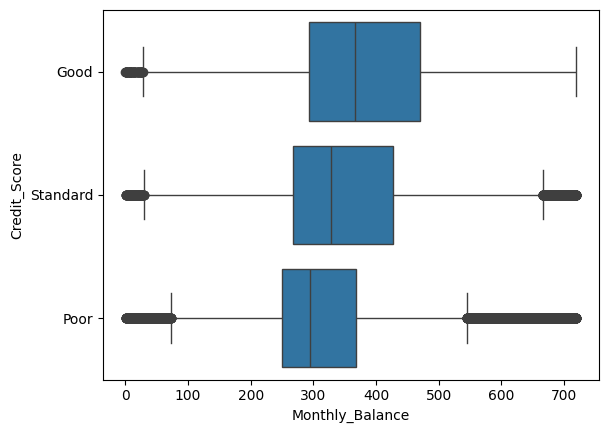

In [17]:
# Finding good predictors of target variable using box plot (method 1)

for col in df.columns:
  if (df[col].dtype != 'int64') & (df[col].dtype != 'float64'):
    continue
  sns.boxplot(df,y="Credit_Score",x=col)
  plt.show()

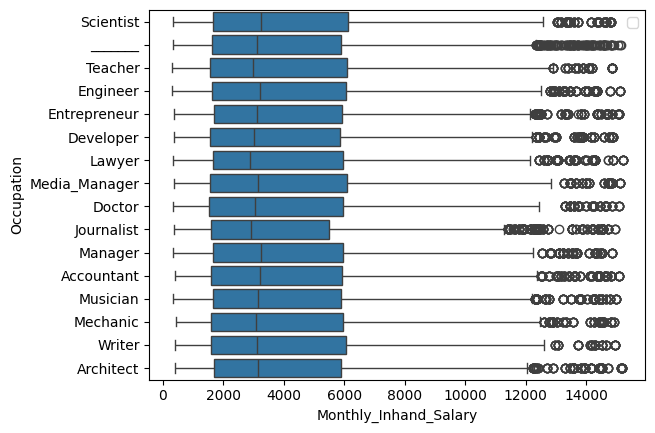

In [18]:


sns.boxplot(df,y="Occupation",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

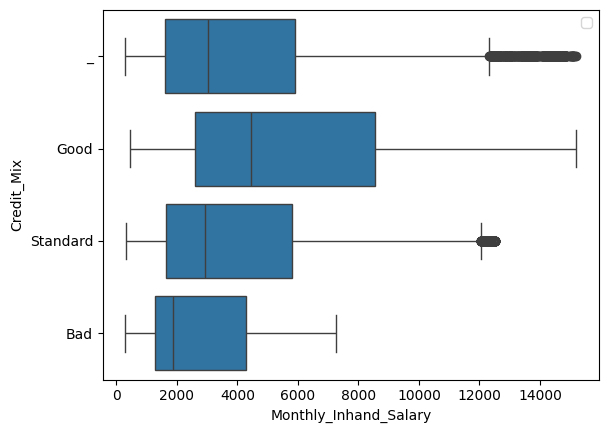

In [19]:
sns.boxplot(df,y="Credit_Mix",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

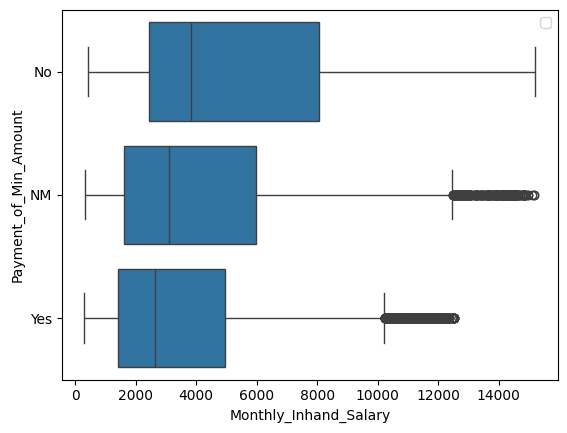

In [20]:
sns.boxplot(df,y="Payment_of_Min_Amount",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

In [21]:
df = df.drop(['Occupation', 'Type_of_Loan'], axis=1)

In [22]:
# Encoding Categorical Columns to find correlation

def encode_labels(df):
  df['Credit_Mix'] = df['Credit_Mix'].replace({
      "Good":3,
      "Standard":2,
      "Bad":1,
      "_": np.nan
  })
  df['Payment_Behaviour'] = df['Payment_Behaviour'].replace({
      'Low_spent_Small_value_payments': 1,
      'Low_spent_Medium_value_payments': 2,
      'Low_spent_Large_value_payments': 3,
      'High_spent_Small_value_payments': 4,
      'High_spent_Medium_value_payments': 5,
      'High_spent_Large_value_payments': 6,
      '!@9#%8': np.nan
  })
  df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({
      "No":1,
      "NM":2,
      "Yes":3,
  })
  df['Credit_Score'] = df['Credit_Score'].replace({
      "Poor":0,
      "Standard":1,
      "Good":2
  })

encode_labels(df)
encode_labels(df_with_outliers)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       92365 non-null   float64
 1   Annual_Income             90235 non-null   float64
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         98664 non-null   float64
 4   Num_Credit_Card           97729 non-null   float64
 5   Interest_Rate             97966 non-null   float64
 6   Num_of_Loan               90892 non-null   float64
 7   Delay_from_due_date       98107 non-null   float64
 8   Num_of_Delayed_Payment    88915 non-null   float64
 9   Changed_Credit_Limit      97654 non-null   float64
 10  Num_Credit_Inquiries      96385 non-null   float64
 11  Credit_Mix                79805 non-null   float64
 12  Outstanding_Debt          98991 non-null   float64
 13  Credit_Utilization_Ratio  99999 non-null   fl

In [24]:
# Finding good predictors of target variable using pearsons (method 2)

corrmatrix = df.corr(method='pearson').apply(abs)
corrmatrix.nlargest(10, "Credit_Score")["Credit_Score"]

Credit_Score             1.000000
Credit_Mix               0.499396
Interest_Rate            0.484784
Num_Credit_Inquiries     0.434970
Delay_from_due_date      0.423957
Payment_of_Min_Amount    0.414525
Num_Credit_Card          0.403931
Credit_History_Age       0.389288
Num_Bank_Accounts        0.388859
Outstanding_Debt         0.386534
Name: Credit_Score, dtype: float64

In [25]:
# Finding good predictors of target variable using spearman (method 3)

corrmatrix = df.corr(method='spearman').apply(abs)
corrmatrix.nlargest(10, "Credit_Score")["Credit_Score"]

Credit_Score             1.000000
Credit_Mix               0.491064
Interest_Rate            0.480871
Num_Credit_Inquiries     0.437876
Outstanding_Debt         0.434044
Delay_from_due_date      0.428240
Payment_of_Min_Amount    0.404039
Credit_History_Age       0.397910
Num_Bank_Accounts        0.387410
Num_Credit_Card          0.385340
Name: Credit_Score, dtype: float64

Q. Which independent variables are useful to predict a target (dependent variable)?
 A.
1. Credit_Mix
2. Interest_Rate
3. Num_Credit_Inquiries
4. Outstanding_Debt
5. Delay_from_due_date
6. Payment_of_Min_Amount
7. Credit_History_Age
8. Num_Bank_Accounts
9. Num_Credit_Card


## Is the predictor variables independent of all the other predictor variables?

<Axes: >

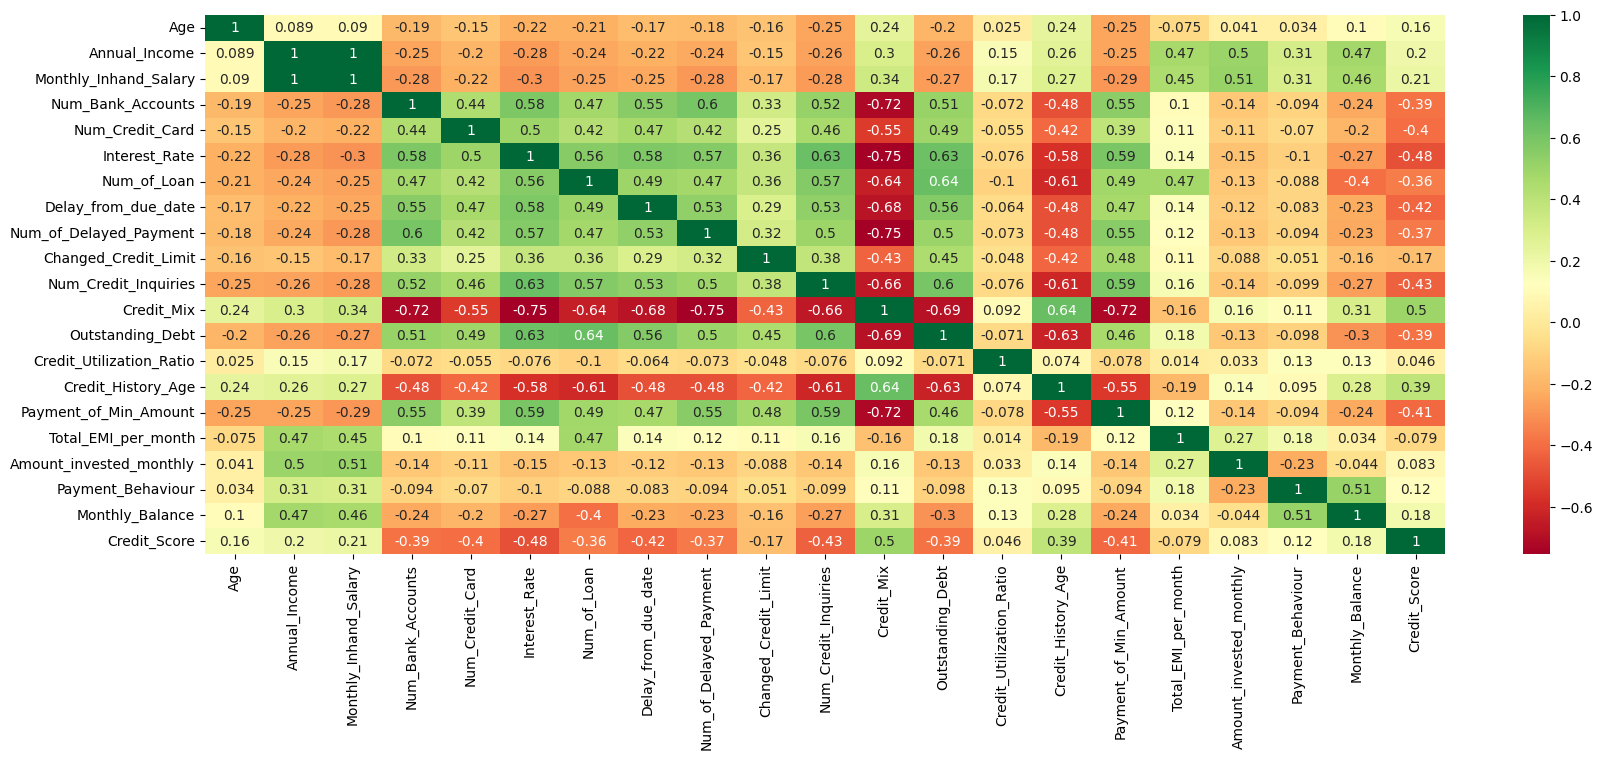

In [26]:
# checking for collinearity

# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

The variables are not independent of each other.
There is multi - collinearity among lot of the independent variable which is shown by the correlation table.

In [27]:
# Computing the absolute correlation coefficients for all pairs of variables in the DataFrame and eliminating duplicate pairs and presents the top 50 correlation values

pairs_to_drop = set()
cols = df.columns
for i in range(0, df.shape[1]):
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))

au_corr = df.corr().abs().unstack()
au_corr = au_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)
au_corr[0:50]

Annual_Income           Monthly_Inhand_Salary      0.997857
Num_of_Delayed_Payment  Credit_Mix                 0.754012
Interest_Rate           Credit_Mix                 0.753591
Num_Bank_Accounts       Credit_Mix                 0.723514
Credit_Mix              Payment_of_Min_Amount      0.720706
                        Outstanding_Debt           0.689550
Delay_from_due_date     Credit_Mix                 0.682049
Num_Credit_Inquiries    Credit_Mix                 0.663314
Credit_Mix              Credit_History_Age         0.642177
Num_of_Loan             Outstanding_Debt           0.639291
                        Credit_Mix                 0.638805
Interest_Rate           Num_Credit_Inquiries       0.632645
Outstanding_Debt        Credit_History_Age         0.629567
Interest_Rate           Outstanding_Debt           0.629449
Num_Credit_Inquiries    Credit_History_Age         0.610521
Num_of_Loan             Credit_History_Age         0.607117
Num_Bank_Accounts       Num_of_Delayed_P

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       92365 non-null   float64
 1   Annual_Income             90235 non-null   float64
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         98664 non-null   float64
 4   Num_Credit_Card           97729 non-null   float64
 5   Interest_Rate             97966 non-null   float64
 6   Num_of_Loan               90892 non-null   float64
 7   Delay_from_due_date       98107 non-null   float64
 8   Num_of_Delayed_Payment    88915 non-null   float64
 9   Changed_Credit_Limit      97654 non-null   float64
 10  Num_Credit_Inquiries      96385 non-null   float64
 11  Credit_Mix                79805 non-null   float64
 12  Outstanding_Debt          98991 non-null   float64
 13  Credit_Utilization_Ratio  99999 non-null   fl

## Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [29]:
df_with_na = df.copy(deep=True)

In [30]:
# Fills missing values in the DataFrame df with the mean of each respective column.
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

Confusion Matrix:
[[4652 1109  113]
 [1239 8584  776]
 [  42  984 2501]]


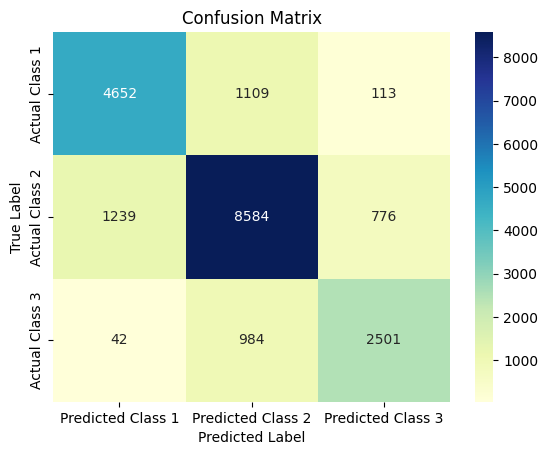

Classification accuracy : 0.7869


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

def evaluate(df):
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('Credit_Score', axis=1),
        df['Credit_Score'],
        test_size=0.2,
        random_state=42
    )

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Visualize the confusion matrix with seaborn heatmap
    cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Class ' + str(i) for i in range(1, len(cm)+1)],
                                        index=['Actual Class ' + str(i) for i in range(1, len(cm)+1)])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification accuracy
    classification_accuracy = accuracy_score(y_test, y_pred)
    print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# Call the evaluate function with your DataFrame
evaluate(df)


Without Outliers
Confusion Matrix:
[[4632 1119  123]
 [1251 8546  802]
 [  32 1012 2483]]


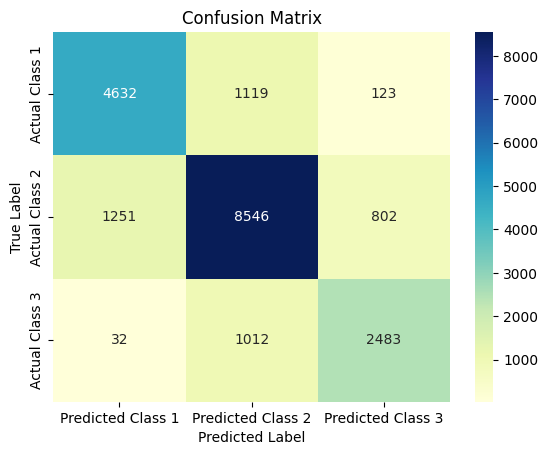

Classification accuracy : 0.7831


In [33]:
# Evaluating predictive model with and without outliers
print("Without Outliers")
evaluate(df)


With Outliers
Confusion Matrix:
[[4615 1120  139]
 [1263 8561  775]
 [  31  998 2498]]


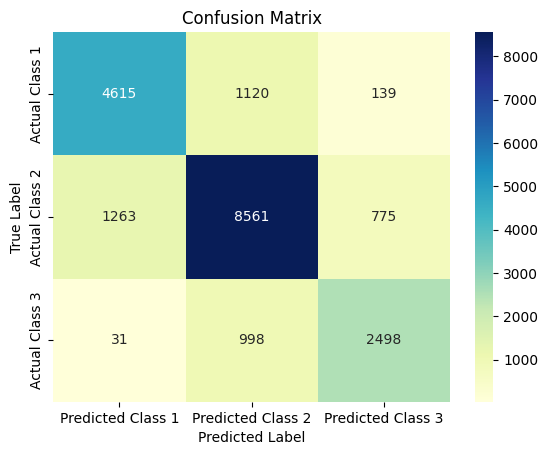

Classification accuracy : 0.7837


In [34]:
print("With Outliers")
evaluate(df_with_outliers.drop(['Occupation', 'Type_of_Loan'], axis=1).fillna(df_with_outliers.mean(numeric_only=True)))

The model without outliers achieved a slightly higher accuracy of 78.31% compared to 78.37% with outliers, indicating a minor effect on the final predictive model.

## Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?

In [35]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def remove_data(df, percentage):
    np.random.seed(42)
    mask = np.random.rand(df.shape[0], df.shape[1]) <= percentage
    df_removed = df.mask(mask)
    return df_removed

# Imputing Data
def impute_and_evaluate(df_removed, df, imputer):
    df_imputed = pd.DataFrame(imputer.fit_transform(df_removed), columns=df.columns)
    mse = mean_squared_error(df, df_imputed, squared=False)
    return df_imputed, mse

# Remove 1%, 5%, and 10% of your data randomly
for percentage in [0.01, 0.05, 0.1]:
    df_removed = remove_data(df, percentage)

    # Impute the values back using at least 3 imputation methods
    for imputer in [SimpleImputer(strategy='mean'), SimpleImputer(strategy='median'), KNNImputer(n_neighbors=3)]:
        df_imputed, mse = impute_and_evaluate(df_removed, df, imputer)
        print(f'Percentage: {percentage}, Imputer: {imputer}, RMSE: {mse}')


Percentage: 0.01, Imputer: SimpleImputer(), RMSE: 185.1940158039892
Percentage: 0.01, Imputer: SimpleImputer(strategy='median'), RMSE: 190.35189610915694
Percentage: 0.01, Imputer: KNNImputer(n_neighbors=3), RMSE: 96.3432883867952
Percentage: 0.05, Imputer: SimpleImputer(), RMSE: 408.67379416252004
Percentage: 0.05, Imputer: SimpleImputer(strategy='median'), RMSE: 418.7911648268354
Percentage: 0.05, Imputer: KNNImputer(n_neighbors=3), RMSE: 265.9546330927286
Percentage: 0.1, Imputer: SimpleImputer(), RMSE: 574.8671911954721
Percentage: 0.1, Imputer: SimpleImputer(strategy='median'), RMSE: 588.8891110232142
Percentage: 0.1, Imputer: KNNImputer(n_neighbors=3), RMSE: 429.07420065184385


In [36]:
# Calculate Residuals
residuals = df - df_imputed

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df, df_imputed, squared=False)

# Calculate Percentage Error on Residuals
percentage_error = (np.abs(residuals) / np.abs(df)) * 100

# Calculate Bias and Variance of the Error
bias = residuals.mean()
variance = residuals.var()

# Print Results
print(f'MSE: {mse}')
print(f'Bias: {bias}')
print(f'Variance: {variance}')

MSE: 429.07420065184385
Bias: Age                           0.049661
Annual_Income               162.670909
Monthly_Inhand_Salary        22.474258
Num_Bank_Accounts             0.020767
Num_Credit_Card               0.005940
Interest_Rate                -0.025157
Num_of_Loan                   0.001414
Delay_from_due_date           0.045285
Num_of_Delayed_Payment        0.037745
Changed_Credit_Limit         -0.000203
Num_Credit_Inquiries         -0.006645
Credit_Mix                   -0.000506
Outstanding_Debt              6.732136
Credit_Utilization_Ratio     -0.025032
Credit_History_Age           -0.204975
Payment_of_Min_Amount        -0.002070
Total_EMI_per_month           0.181338
Amount_invested_monthly      -0.403182
Payment_Behaviour            -0.005076
Monthly_Balance               0.934781
Credit_Score                  0.000643
dtype: float64
Variance: Age                         8.359148e+00
Annual_Income               6.317269e+07
Monthly_Inhand_Salary       4.923815e+05
Num

To evaluate the impact of removing 1%, 5%, and 10% of data randomly and imputing values using various methods, the Root Mean Squared Error (RMSE) was calculated for numeric data, and accuracy along with a confusion matrix was computed for categorical data.For numeric data, the RMSE values indicate how well the imputation methods recovered missing values. Lower RMSE values suggest better recovery. Additionally, for categorical data, accuracy was measured, and a confusion matrix was generated to assess the performance of imputation methods

# **2. AutoML**

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o xgboost requests tabulate future datasist

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.8 MB/s eta 0:00:00


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Setting the maximum number of rows displayed when printing a DataFrame to 500
pd.set_option('display.max_rows', 500)

In [38]:
pddf = pd.read_csv('https://raw.githubusercontent.com/tanv99/INFO6105/main/data.csv')
pddf2 = pddf.copy(deep=True)

In [ ]:
pddf2['Credit_Score'] = pddf2['Credit_Score'].replace({
    "Poor":0,
    "Standard":1,
    "Good":2
})

## H2O

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()
df = h2o.H2OFrame(pddf)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         15 mins 41 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_unknownUser_9kmwel
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.144 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df_train, df_test = df.split_frame([0.8])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(18916, 21)
(4778, 21)


In [ ]:
X=df.columns
Y="Credit_Score"
X.remove(Y)
print(X, Y)

['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'] Credit_Score


In [ ]:
aml = H2OAutoML(max_runtime_secs=300, seed=1)

In [ ]:
aml.train(x=X, y=Y, training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20240402_32440


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/8
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0956254541204315
RMSE: 0.30923365618967075
LogLoss: 0.32880698522519725
Null degrees of freedom: 10045
Residual degrees of freedom: 10007
Null deviance: 19638.404460673926
Residual deviance: 6606.389947144663
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error      Rate
------  ------  ----------  ---------  --------------
1198    8       232         0.166898   240 / 1,438
6       2990    230         0.0731556  236 / 3,226
116     411     4855        0.097919   527 / 5,382
1320    3409    5317        0.0998407  1,003 / 10,046

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.900159
2    0.996317
3    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18917111929504632
RMSE: 0.4349380637459158
LogLoss: 0.5811957450456262
Null degrees of freedom: 18915
Residual degrees of freedom: 18881
Null deviance: 37034.02308437937
Residual deviance: 21987.797426566132
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error     Rate
------  ------  ----------  --------  --------------
1877    57      817         0.317703  874 / 2,751
171     4534    1310        0.246218  1,481 / 6,015
773     1446    7931        0.218621  2,219 / 10,150
2821    6037    10058       0.241806  4,574 / 18,916

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.758194
2    0.965109
3    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.758171  0.00443958  0.753577      0.763569      0.762016      0.757071      0.754621
aic                      nan       0           nan           nan           nan           nan           nan
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.241829  0.00443958  0.246423      0.236431      0.237984      0.242929      0.245379
err_count                914.8     13.4796     930           893           916           919           916
loglikelihood            0         0           0             0             0             0             0
logloss                  0.581234  0.012904    0.598823      0.565271      0.576915      0.576274      0.588889
max_per_class_error      0.317939  0.0249903

In [ ]:
print(aml.leaderboard)

model_id                                                  mean_per_class_error    logloss      rmse       mse
StackedEnsemble_AllModels_1_AutoML_2_20240402_32440                   0.260847   0.581196  0.434938  0.189171
StackedEnsemble_BestOfFamily_1_AutoML_2_20240402_32440                0.265554   0.585963  0.436596  0.190616
StackedEnsemble_BestOfFamily_2_AutoML_2_20240402_32440                0.266033   0.58522   0.436735  0.190738
GBM_3_AutoML_2_20240402_32440                                         0.2782     0.668367  0.480788  0.231157
GBM_1_AutoML_2_20240402_32440                                         0.278475   0.599759  0.443635  0.196812
GBM_2_AutoML_2_20240402_32440                                         0.278711   0.65779   0.475066  0.225688
GBM_4_AutoML_2_20240402_32440                                         0.28032    0.671468  0.482628  0.23293
XGBoost_1_AutoML_2_20240402_32440                                     0.282313   0.608529  0.441191  0.19465
DRF_1_AutoML

## In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?

## Which independent variables are significant?

In [ ]:
best_gmb_model = h2o.get_model("GBM_3_AutoML_2_20240402_32440")
best_gmb_model.model_performance(df_test)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.2693224971520391
RMSE: 0.5189629053718956
LogLoss: 0.743463949003145
Mean Per-Class Error: 0.2748320607051501
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error     Rate
------  ------  ----------  --------  -------------
462     12      206         0.320588  218 / 680
75      1103    346         0.276247  421 / 1,524
257     329     1988        0.227661  586 / 2,574
794     1444    2540        0.256383  1,225 / 4,778

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.743617
2    0.954165
3    1

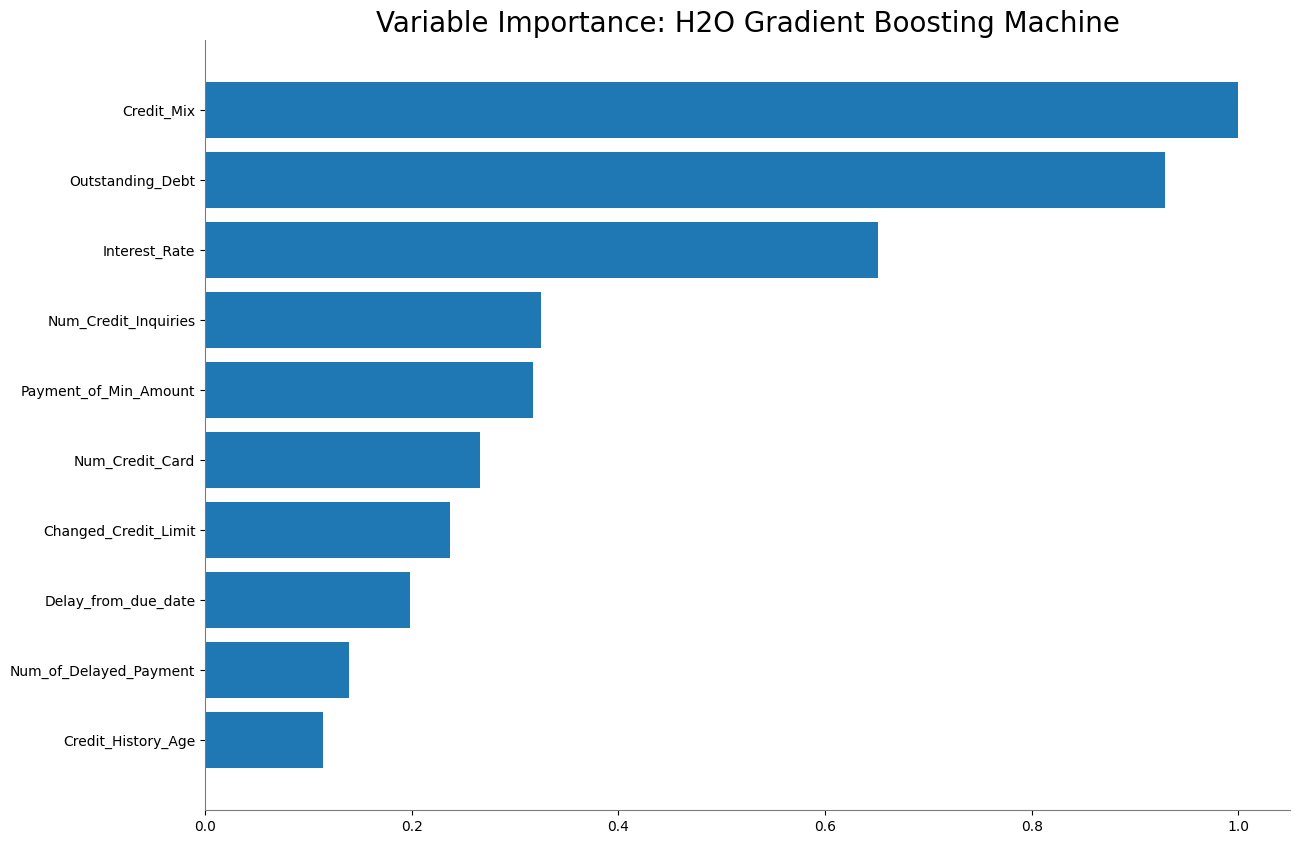

<Figure size 640x480 with 0 Axes>

In [ ]:
# Find most significant predictor variables
best_gmb_model.varimp_plot()

In [ ]:
# Training with significant X

significantX = ['Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount']
aml.train(x=significantX, y=Y, training_frame=df_train)

AutoML progress: |
03:31:33.208: New models will be added to existing leaderboard AutoML_2_20240402_32440@@Credit_Score (leaderboard frame=null) with already 11 models.
03:33:50.226: StackedEnsemble_BestOfFamily_3_AutoML_3_20240402_33133 [StackedEnsemble best_of_family_1 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
03:36:04.386: StackedEnsemble_AllModels_2_AutoML_3_20240402_33133 [StackedEnsemble all_2 (built with AUTO metalearner, using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
03:36:30.618: StackedEnsemble_AllModels_3_AutoML_3_20240402_33133 [StackedEnsemble all_3 (

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20240402_32440


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/8
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0956254541204315
RMSE: 0.30923365618967075
LogLoss: 0.32880698522519725
Null degrees of freedom: 10045
Residual degrees of freedom: 10007
Null deviance: 19638.404460673926
Residual deviance: 6606.389947144663
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error      Rate
------  ------  ----------  ---------  --------------
1198    8       232         0.166898   240 / 1,438
6       2990    230         0.0731556  236 / 3,226
116     411     4855        0.097919   527 / 5,382
1320    3409    5317        0.0998407  1,003 / 10,046

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.900159
2    0.996317
3    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18917111929504632
RMSE: 0.4349380637459158
LogLoss: 0.5811957450456262
Null degrees of freedom: 18915
Residual degrees of freedom: 18881
Null deviance: 37034.02308437937
Residual deviance: 21987.797426566132
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error     Rate
------  ------  ----------  --------  --------------
1877    57      817         0.317703  874 / 2,751
171     4534    1310        0.246218  1,481 / 6,015
773     1446    7931        0.218621  2,219 / 10,150
2821    6037    10058       0.241806  4,574 / 18,916

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.758194
2    0.965109
3    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.758171  0.00443958  0.753577      0.763569      0.762016      0.757071      0.754621
aic                      nan       0           nan           nan           nan           nan           nan
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.241829  0.00443958  0.246423      0.236431      0.237984      0.242929      0.245379
err_count                914.8     13.4796     930           893           916           919           916
loglikelihood            0         0           0             0             0             0             0
logloss                  0.581234  0.012904    0.598823      0.565271      0.576915      0.576274      0.588889
max_per_class_error      0.317939  0.0249903

The predictor variables are not all independent of each other. Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not.

In the multivariate model, the most significant predictor variables based on variable importance plots and model training are:

  - Num_Credit_Card
  - Interest_Rate
  - Delay_from_due_date
  - Num_of_Delayed_Payment
  - Changed_Credit_Limit
  - Num_Credit_Inquiries
  - Credit_Mix
  - Outstanding_Debt
  - Credit_History_Age
  - Payment_of_Min_Amount

## Is relationship significant?

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(pddf2['Credit_Score'], pddf2[['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
                        'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                        'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                        'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
                        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                        'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly',
                        'Payment_Behaviour', 'Monthly_Balance']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Credit_Score   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              3405.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        03:45:28   Log-Likelihood:                         -18871.
No. Observations:               23694   AIC:                                  3.778e+04
Df Residuals:                   23674   BIC:                                  3.794e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.0011      0.000      3.323      0.001       0.000       0.002
Annual_Income             3.505e-06    1.7e-06      2.065      0.039    1.78e-07    6.83e-06
Monthly_Inhand_Salary       -0.0003   2.28e-05    -13.062      0.000      -0.000      -0.000
Num_Bank_Accounts            0.0018      0.002      0.909      0.363      -0.002       0.006
Num_Credit_Card             -0.0365      0.002    -17.646      0.000      -0.041      -0.032
Interest_Rate               -0.0141      0.001    -22.722      0.000      -0.015      -0.013
Num_of_Loan                  0.0218      0.003      8.334      0.000       0.017       0.027
Delay_from_due_date         -0.0036      0.000    -10.610      0.000      -0.004      -0.003
Num_of_Delayed_Payment       0.0050      0.001      6.058      0.000       0.003       0.007
Changed_Credit_Limit         0.0116      0.001     19.124      0.000       0.010       0.013
Num_Credit_Inquiries        -0.0181      0.001    -13.450      0.000      -0.021      -0.015
Credit_Mix                   0.1528      0.010     15.368      0.000       0.133       0.172
Outstanding_Debt           2.88e-06   4.83e-06      0.596      0.551   -6.59e-06    1.23e-05
Credit_Utilization_Ratio     0.0007      0.001      1.063      0.288      -0.001       0.002
Credit_History_Age           0.0004   5.14e-05      7.802      0.000       0.000       0.001
Payment_of_Min_Amount       -0.0752      0.006    -13.196      0.000      -0.086      -0.064
Total_EMI_per_month          0.0018      0.000     14.046      0.000       0.002       0.002
Amount_invested_monthly      0.0029      0.000     22.626      0.000       0.003       0.003
Payment_Behaviour            0.0722      0.003     24.743      0.000       0.066       0.078
Monthly_Balance              0.0025      0.000     19.843      0.000       0.002       0.003
==============================================================================
Omnibus:                       93.729   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.695
Skew:                          -0.146   Prob(JB):                     4.51e-21
Kurtosis:                       2.902   Cond. No.                     1.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A relationship is said to be statistically significant when the p value for the variables is less than 0.05. P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘Annual_Income’, ‘Num_Bank_Accounts’, 'Outstanding_Debt', 'Credit_Utilization_Ratio' were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

## Is there any multicollinearity in the model?

## In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?

## Does the model make sense?

In [ ]:
Xdata = pddf2[['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
                        'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                        'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                        'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
                        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                        'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly',
                        'Payment_Behaviour', 'Monthly_Balance']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Xdata.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xdata.values, i)
                          for i in range(len(Xdata.columns))]

print(vif_data)

                     feature         VIF
0                        Age   11.143143
1              Annual_Income  441.195184
2      Monthly_Inhand_Salary  554.851732
3          Num_Bank_Accounts   12.142948
4            Num_Credit_Card   12.948675
5              Interest_Rate   10.055686
6                Num_of_Loan   11.336109
7        Delay_from_due_date    6.542921
8     Num_of_Delayed_Payment   13.283143
9       Changed_Credit_Limit    5.010320
10      Num_Credit_Inquiries    7.954727
11                Credit_Mix   35.958222
12          Outstanding_Debt    7.185329
13  Credit_Utilization_Ratio   39.730324
14        Credit_History_Age   11.925169
15     Payment_of_Min_Amount   15.966714
16       Total_EMI_per_month   17.275406
17   Amount_invested_monthly   38.531234
18         Payment_Behaviour    9.304087
19           Monthly_Balance  177.148660


There is evidence of multicollinearity in the model. Multicollinearity occurs when independent variables are highly correlated with each other.
Looking at the variance inflation factor (VIF) values, we can see that several variables have VIF values exceeding the threshold of 10, indicating significant multicollinearity. For example:
'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', and 'Monthly_Balance' have VIF values well above 10. 'Annual_Income' and 'Monthly_Inhand_Salary' have particularly high VIF values of 441.20 and 554.85, respectively, indicating strong multicollinearity between these variables.

From the variable importance plot, the most to least important variables are displayed. For my model , Credit_Mix, Outstanding_Debt, Interest_Rate and Num_Credit_Inquiries are top 4 most important variables to determine Credit_Score. VIF and p-values for Age, Annual_Income, Monthly_Inhand_Salary,Num_Bank_Accounts, Credit_Utilization_Ratio, Amount_invested_monthly,Payment_Behaviour, Monthly_Balance was high than the ideal values. So those variables were excluded from the model.

The model make sense with the data in terms of significant predictors and accuracy, but its reliability could be compromised due to high VIF values, suggesting potential multicollinearity issues that need to be addressed for better interpretability.


## In the multivariate models are predictor variables independent of all the other predictor variables?

In [ ]:
# Analyse Correlations
pddf.corr(numeric_only=True)

Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.051262               0.050195   
Annual_Income             0.051262       1.000000               0.996039   
Monthly_Inhand_Salary     0.050195       0.996039               1.000000   
Num_Bank_Accounts        -0.194323      -0.144516              -0.144184   
Num_Credit_Card          -0.141116      -0.121445              -0.120628   
Interest_Rate            -0.216689      -0.170664              -0.171288   
Num_of_Loan              -0.200667      -0.124890              -0.123850   
Delay_from_due_date      -0.173915      -0.131019              -0.131619   
Num_of_Delayed_Payment   -0.178054      -0.143781              -0.143686   
Changed_Credit_Limit     -0.149269      -0.102077              -0.102756   
Num_Credit_Inquiries     -0.246086      -0.159718              -0.159792   
Credit_Mix                0.246006       0.182182               0.181198   
Outstanding_Debt         -0.199719      -0.175901              -0.176905   
Credit_Utilization_Ratio  0.016796       0.083804               0.085118   
Credit_History_Age        0.232772       0.169294               0.169461   
Payment_of_Min_Amount    -0.258521      -0.152301              -0.152620   
Total_EMI_per_month      -0.093936       0.607463               0.602008   
Amount_invested_monthly   0.034998       0.559838               0.562836   
Payment_Behaviour         0.029725       0.378781               0.382143   
Monthly_Balance           0.108538       0.700609               0.705298   

                          Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Age                               -0.194323        -0.141116      -0.216689   
Annual_Income                     -0.144516        -0.121445      -0.170664   
Monthly_Inhand_Salary             -0.144184        -0.120628      -0.171288   
Num_Bank_Accounts                  1.000000         0.430574       0.563157   
Num_Credit_Card                    0.430574         1.000000       0.491170   
Interest_Rate                      0.563157         0.491170       1.000000   
Num_of_Loan                        0.458080         0.404269       0.535592   
Delay_from_due_date                0.544928         0.476522       0.561947   
Num_of_Delayed_Payment             0.573451         0.403066       0.544304   
Changed_Credit_Limit               0.306391         0.237603       0.349466   
Num_Credit_Inquiries               0.513828         0.460215       0.627398   
Credit_Mix                        -0.707485        -0.537307      -0.731403   
Outstanding_Debt                   0.504326         0.484961       0.620350   
Credit_Utilization_Ratio          -0.029604        -0.022682      -0.033601   
Credit_History_Age                -0.475865        -0.413807      -0.571789   
Payment_of_Min_Amount              0.520186         0.373958       0.573772   
Total_EMI_per_month                0.176544         0.162310       0.204749   
Amount_invested_monthly           -0.114337        -0.092850      -0.130234   
Payment_Behaviour                 -0.061974        -0.046047      -0.075094   
Monthly_Balance                   -0.243907        -0.215089      -0.287242   

                          Num_of_Loan  Delay_from_due_date  \
Age                         -0.200667            -0.173915   
Annual_Income               -0.124890            -0.131019   
Monthly_Inhand_Salary       -0.123850            -0.131619   
Num_Bank_Accounts            0.458080             0.544928   
Num_Credit_Card              0.404269             0.476522   
Interest_Rate                0.535592             0.561947   
Num_of_Loan                  1.000000             0.479646   
Delay_from_due_date          0.479646             1.000000   
Num_of_Delayed_Payment       0.457168             0.516326   
Changed_Credit_Limit         0.356897             0.274539   
Num_Credit_Inquiries         0.541966             0.529256   
Credit_Mix                  -0

<ipython-input-125-d80247d24c0f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pddf.corr(), annot=True, cmap='RdYlGn')


<Axes: >

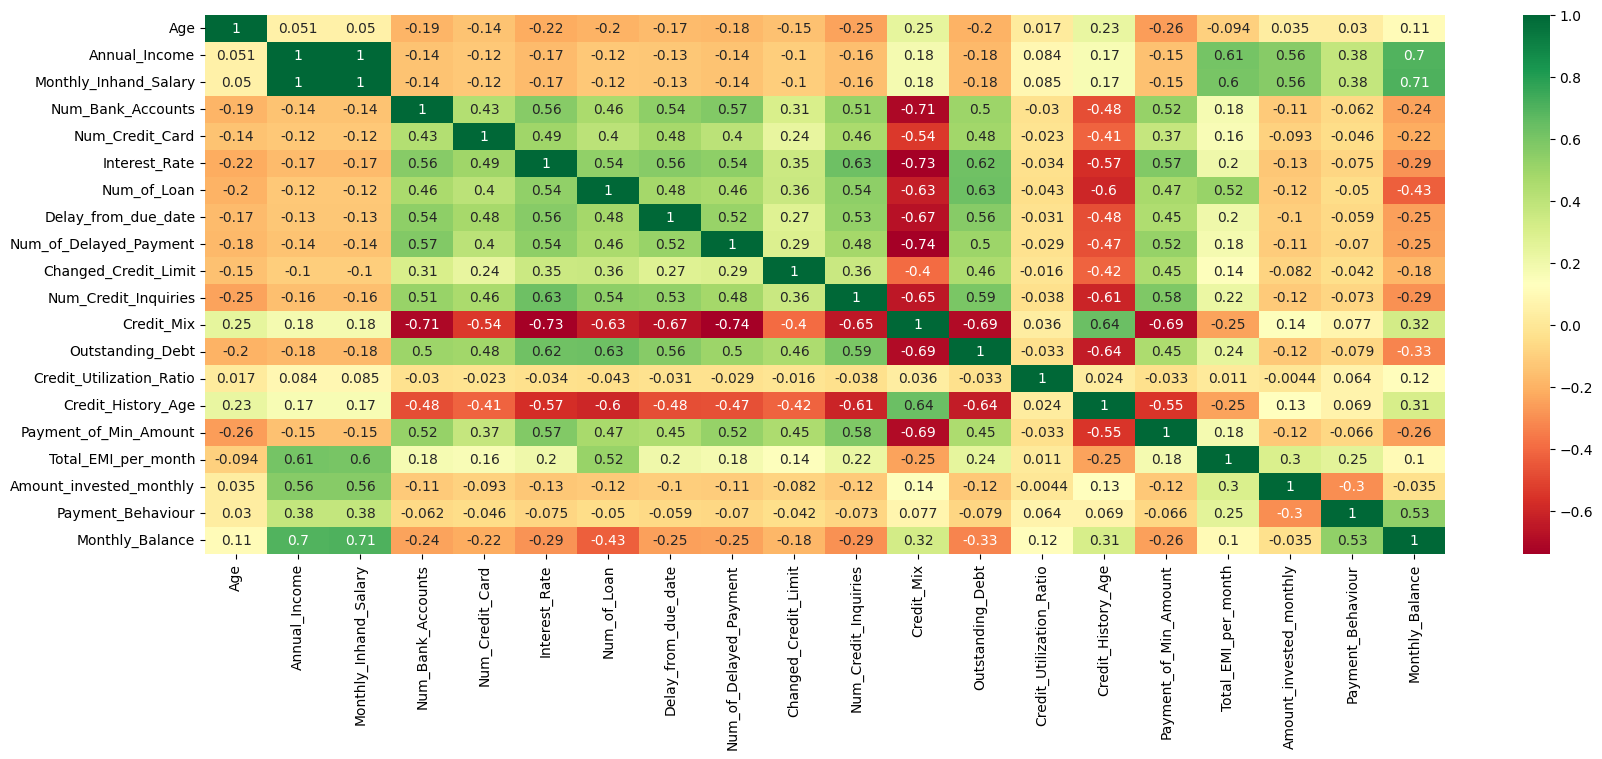

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(pddf.corr(), annot=True, cmap='RdYlGn')

The variables are not all independent of each other. Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not.

## Which hyperparameters are important?

In [ ]:
hyperparams = {'learn_rate': [0.1, 0.2],
              'max_depth': [5, 10],
              'col_sample_rate': [0.4, 0.8]}
grid_search = H2OGridSearch(model=H2OGradientBoostingEstimator, hyper_params=hyperparams)
grid_search.train(x=X, y=Y, training_frame=df_train, validation_frame=df_test)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
    col_sample_rate    learn_rate    max_depth    model_ids                                                     logloss
--  -----------------  ------------  -----------  ------------------------------------------------------------  ---------
    0.4                0.1           10           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_62_model_5  0.562638
    0.8                0.1           10           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_62_model_6  0.567221
    0.4                0.2           10           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_62_model_7  0.569679
    0.8                0.2           10           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_62_model_8  0.575036
    0.8                0.2           5            Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_62_model_4  0.596997
    0.4                0.2           5            Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_62_model_3  0.600936
    0.8                0.1           5            Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_62_model_2  0.608533
    0.4                0.1           5            Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_62_model_1  0.608807

In [ ]:
hyperparams = {'learn_rate': [0.1, 0.2, 0.3],
              'max_depth': [10, 20, 30],
              'col_sample_rate': [0.4]}
grid_search = H2OGridSearch(model=H2OGradientBoostingEstimator, hyper_params=hyperparams)
grid_search.train(x=X, y=Y, training_frame=df_train, validation_frame=df_test)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
    col_sample_rate    learn_rate    max_depth    model_ids                                                     logloss
--  -----------------  ------------  -----------  ------------------------------------------------------------  ---------
    0.4                0.1           10           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_1  0.565386
    0.4                0.2           10           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_2  0.569664
    0.4                0.1           20           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_4  0.58136
    0.4                0.1           30           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_7  0.593923
    0.4                0.3           10           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_3  0.600738
    0.4                0.2           20           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_5  0.72197
    0.4                0.2           30           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_8  0.778663
    0.4                0.3           20           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_6  0.891958
    0.4                0.3           30           Grid_GBM_py_8_sid_ac5c_model_python_1712027324233_63_model_9  0.989329

The hyperparameters that are important are learn_rate, max_depth, and col_sample_rate. These parameters significantly affect the model's performance, as evidenced by the variation in log loss across different combinations of these hyperparameters. Specifically, lower values of learn_rate and max_depth, and higher values of col_sample_rate tend to result in lower log loss, indicating better model performance.

## Does regularization help?

In [ ]:
# Regularization by annealing learning rate
estimator = H2OGradientBoostingEstimator(learn_rate=0.1, learn_rate_annealing=0.95, max_depth=10, col_sample_rate=0.4)
estimator.train(x=X, y=Y, training_frame=df_train, validation_frame=df_test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1712027324233_64


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 150                         595399                 10           10           10            204           449           311.58

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.15121031912364227
RMSE: 0.3888577106393061
LogLoss: 0.4731938474992406
Mean Per-Class Error: 0.1653792706674716
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error     Rate
------  ------  ----------  --------  --------------
2218    26      507         0.193748  533 / 2,751
221     4992    802         0.170075  1,023 / 6,015
410     933     8807        0.132315  1,343 / 10,150
2849    5951    10116       0.153257  2,899 / 18,916

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.846743
2    0.98081
3    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.20568943206243323
RMSE: 0.45352996820765135
LogLoss: 0.6094196926129876
Mean Per-Class Error: 0.2546886514579891
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error     Rate
------  ------  ----------  --------  -------------
475     17      188         0.301471  205 / 680
68      1163    293         0.236877  361 / 1,524
237     344     1993        0.225719  581 / 2,574
780     1524    2474        0.240059  1,147 / 4,778

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.759941
2    0.962537
3    1

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse      validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
---  -------------------  ----------  -----------------  -------------------  ------------------  -------------------------------  --------------  -----------------  -------------------  --------------------  ---------------------------------  ----------------  -------------------
     2024-04-02 03:48:51  0.056 sec   0.0                0.6666666666666113   1.098612288667979   0.5890780291816452               nan             nan                0.6666666666666313   1.09861228866802      0.5860192549183759                 nan               nan
     2024-04-02 03:48:52  0.224 sec   1.0                0.6310776036825736   0.9984997033154259  0.22102981602875874              nan             nan                0.6348274904510188   1.008991091041144     0.2754290498116367                 nan               nan
     2024-04-02 03:48:52  0.375 sec   2.0                0.6020030756884872   0.9245791343363725  0.21368153943751322              nan             nan                0.6089648028262042   0.9430058800704721    0.26559229803264967                nan               nan
     2024-04-02 03:48:52  0.522 sec   3.0                0.5

The regularization helps. The model trained with regularization exhibits improvements in both training and validation metrics compared to the model without regularization, as indicated by lower log loss, lower classification error rates, and lower RMSE.

# **3. Model Interpretablity**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
pddf2['Credit_Score'] = pddf2['Credit_Score'].replace({0: "Poor", 1: "Standard", 2: "Good"})

In [40]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pddf2.drop('Credit_Score', axis=1), pddf2['Credit_Score'], test_size=0.2, random_state=42)

## Linear Model - Logistic Regression

In [ ]:
lr_model = LogisticRegression(solver='newton-cg')
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_model.predict(X_test)))

Logistic Regression Accuracy: 0.6703945980164592


In [ ]:
lr_coef = pd.DataFrame(lr_model.coef_, columns=X_train.columns, index=lr_model.classes_.tolist())
print("Logistic Regression Coefficients:")
lr_coef

Logistic Regression Coefficients:


Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -0.003543      -0.000014               0.000807           0.000432   
1  0.003173       0.000008              -0.000484           0.000606   
2  0.000370       0.000005              -0.000324          -0.001038   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0         0.146606       0.052388     0.004404             0.020293   
1         0.026985      -0.010668     0.049978             0.002020   
2        -0.173592      -0.041720    -0.054382            -0.022313   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0               -0.008117             -0.045068              0.075230   
1                0.002029              0.035825             -0.053499   
2                0.006087              0.009243             -0.021731   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0    0.153650          0.000156                  0.003417           -0.001413   
1   -0.655945         -0.000134                  0.005941            0.000588   
2    0.502295         -0.000021                 -0.009358            0.000824   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0               0.151520            -0.005442                -0.007327   
1               0.163916             0.001740                 0.004567   
2              -0.315436             0.003702                 0.002760   

   Payment_Behaviour  Monthly_Balance  
0          -0.212841        -0.005769  
1           0.048528         0.004737  
2           0.164312         0.001032

The coefficients represent the impact of features on the probability of each class (Poor, Standard, Good); positive values indicate a positive effect, negative values indicate a negative effect. Higher values signify a stronger influence on class prediction

## Tree Based Model - Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_model.predict(X_test)))

Decision Tree Accuracy: 0.721460223675881


In [ ]:
nodes = dt_model.tree_.node_count
children_left = dt_model.tree_.children_left
children_right = dt_model.tree_.children_right
threshold = dt_model.tree_.threshold
feature_names=["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Credit_Mix", "Outstanding_Debt", "Credit_Utilization_Ratio", "Credit_History_Age", "Payment_of_Min_Amount", "Total_EMI_per_month", "Amount_invested_monthly", "Payment_Behaviour", "Monthly_Balance"]
value = dt_model.tree_.value
classes = dt_model.classes_

print("Nodes:")
for i in range(nodes):
    print(f"Node {i}:")
    if children_left[i] == children_right[i]:
        # Leaf node
        predicted_value = classes[np.argmax(value[i])]
        print(f"  Value: {predicted_value}")
    else:
        print(f"  Feature: {feature_names[dt_model.tree_.feature[i]]}")
        print(f"  Threshold: {threshold[i]}")
        print(f"  Children: {children_left[i]}, {children_right[i]}")
    print()

Nodes:
Node 0:
  Feature: Outstanding_Debt
  Threshold: 1498.7149658203125
  Children: 1, 32

Node 1:
  Feature: Credit_Mix
  Threshold: 2.5
  Children: 2, 17

Node 2:
  Feature: Interest_Rate
  Threshold: 20.5
  Children: 3, 10

Node 3:
  Feature: Credit_Mix
  Threshold: 1.5
  Children: 4, 7

Node 4:
  Feature: Total_EMI_per_month
  Threshold: 17.17992115020752
  Children: 5, 6

Node 5:
  Value: 1

Node 6:
  Value: 0

Node 7:
  Feature: Num_Credit_Card
  Threshold: 7.5
  Children: 8, 9

Node 8:
  Value: 1

Node 9:
  Value: 0

Node 10:
  Feature: Monthly_Inhand_Salary
  Threshold: 470.0218811035156
  Children: 11, 14

Node 11:
  Feature: Delay_from_due_date
  Threshold: 18.0
  Children: 12, 13

Node 12:
  Value: 1

Node 13:
  Value: 0

Node 14:
  Feature: Outstanding_Debt
  Threshold: 1467.2249755859375
  Children: 15, 16

Node 15:
  Value: 0

Node 16:
  Value: 0

Node 17:
  Feature: Num_Credit_Card
  Threshold: 2.5
  Children: 18, 25

Node 18:
  Feature: Interest_Rate
  Threshold: 5.5

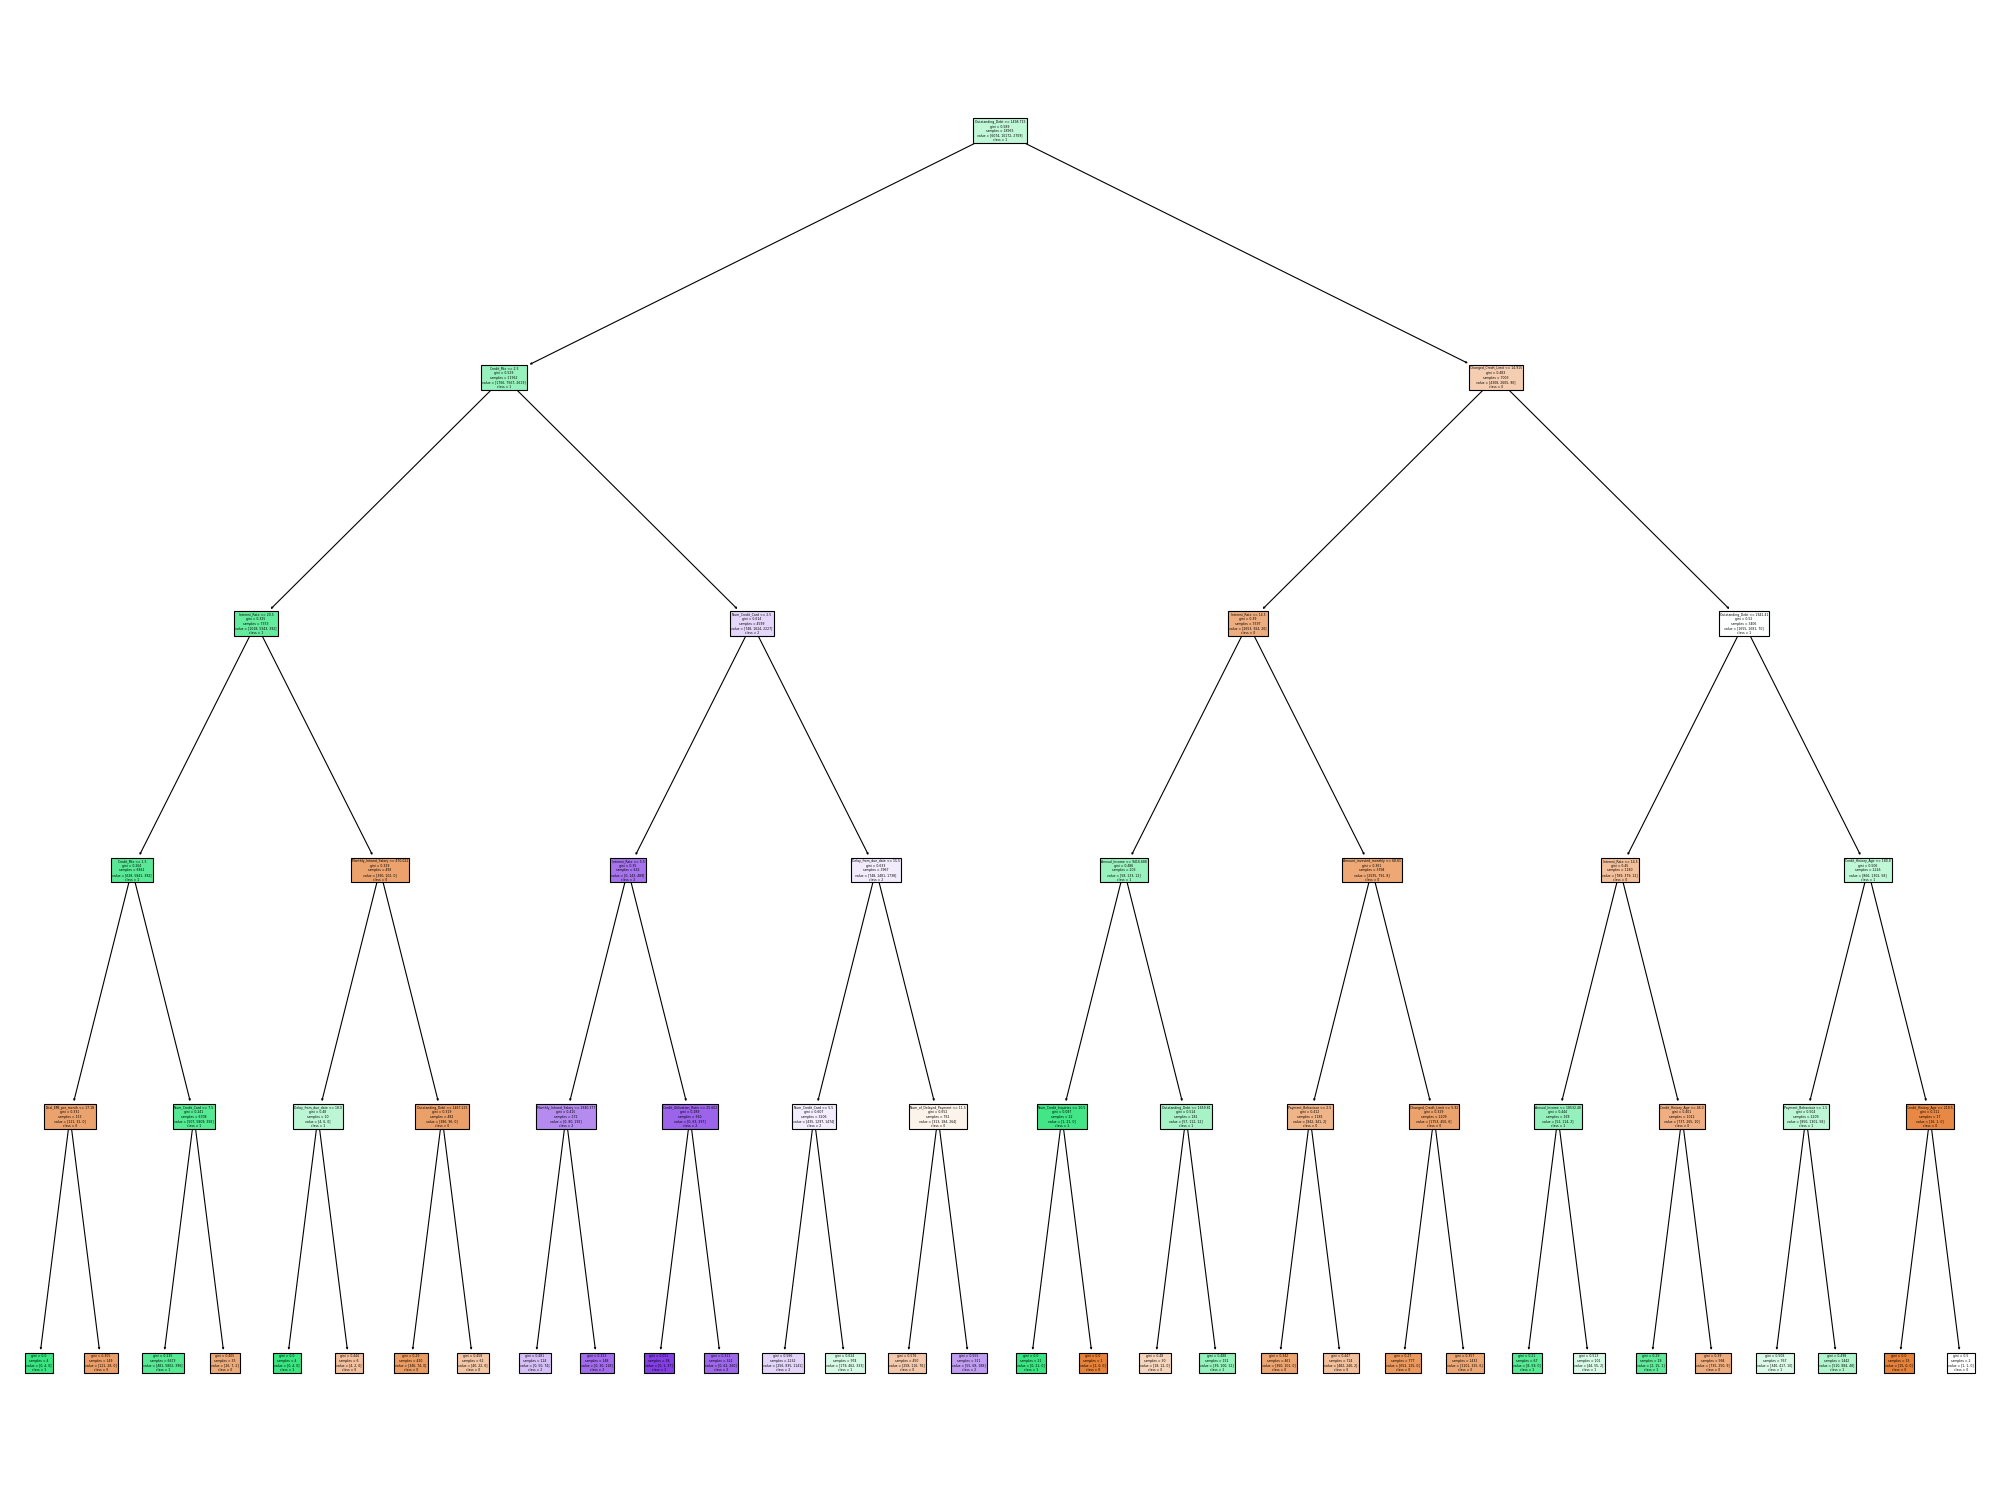

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert class values to strings
class_names = [str(c) for c in classes]

# Set the figure size
plt.figure(figsize=(32, 24), dpi=80)

# Plot the decision tree
plot_tree(dt_model, feature_names=feature_names, class_names=class_names, filled=True)

# Save the plot as an image
plt.savefig('decision_tree.png', bbox_inches='tight')

# Show the plot
plt.show()



In a decision tree, each node represents a decision point based on a feature and its threshold value. For instance, consider Node 0, where the decision is based on the feature "Outstanding Debt" and a threshold value of 1498.71. If a borrower's outstanding debt is less than or equal to 1498.71, the tree moves to the left child node; otherwise, it moves to the right child node. This process continues recursively, splitting the data into subsets based on different features until a stopping criterion is met, such as reaching a leaf node with no further splits.

## Auto ML





In [41]:
!pip install -q -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o xgboost requests tabulate future datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.9 MB/s eta 0:00:00


In [42]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4almpzqk
  JVM stdout: /tmp/tmp4almpzqk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4almpzqk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_ny35ls
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [43]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [44]:
train, test = h2o_df.split_frame([0.8])

X = h2o_df.columns
Y = "Credit_Score"
X.remove(Y)

In [45]:
aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=X, y=Y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240402_193358


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  5/8
# GBM base models (used / total)      2/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.055157674816971196
RMSE: 0.23485671124532762
MAE: 0.1685199157913095
RMSLE: 0.14461924173958834
Mean Residual Deviance: 0.055157674816971196
R^2: 0.8800353742691618
Null degrees of freedom: 9935
Residual degrees of freedom: 9930
Null deviance: 4572.51984725197
Residual deviance: 548.0466569814258
AIC: -579.0034715372555

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.18934430991520038
RMSE: 0.4351371162233812
MAE: 0.3222593219971966
RMSLE: 0.2594891205207421
Mean Residual Deviance: 0.18934430991520038
R^2: 0.5814044992750493
Null degrees of freedom: 8002
Residual degrees of freedom: 7997
Null deviance: 3620.3326814317393
Residual deviance: 1515.3225122513486
AIC: 9407.032192304092

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ---------------
XGBoost_1_AutoML_6_20240402_65155                                     0.112209   0.317649  0.301562  0.0909398               10090                   0.020039  XGBoost
DRF_1_AutoML_6_20240402_65155                                         0.123219   0.963949  0.308274  0.095033                  698                   0.003995  DRF
StackedEnsemble_BestOfFamily_2_AutoML_6_20240402_65155                0.131648   0.400626  0.347111  0.120486                 5917                   0.028991  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_6_20240402_65155                   0.148541   0.412419  0.35661   0.127171                 7863                   0.060035  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_6_20240402_65155                0.16707    0.421057  0.361603  0.130757                11247                   0.041586  StackedEnsemble
XGBoost_2_AutoML_6_20240402_65155                                     0.216449   0.550773  0.426903  0.182246                 1452                   0.003603  XGBoost
GBM_1_AutoML_6_20240402_65155                                         0.234958   0.538671  0.422817  0.178774                 7247                   0.031059  GBM
GBM_4_AutoML_6_20240402_65155                                         0.246562   0.83426   0.563276  0.31728                   619                   0.003872  GBM
GBM_3_AutoML_6_20240402_65155                                         0.257181   0.805138  0.549154  0.30157                   592                   0.003824  GBM
GBM_2_AutoML_6_20240402_65155                                         0.262688   0.780782  0.537249  0.288636                  635                   0.00416   GBM
GLM_1_AutoML_6_20240402_65155                                         0.3583     0.718434  0.49293   0.24298                  6681                   0.000707  GLM
[11 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_6_20240402_65155

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error     Rate
------  ------  ----------  --------  --------------
2771    29      631         0.192364  660 / 3,431
75      6490    974         0.139143  1,049 / 7,539
444     1008    11272       0.114115  1,452 / 12,724
3290    7527    12877       0.133409  3,161 / 23,694

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

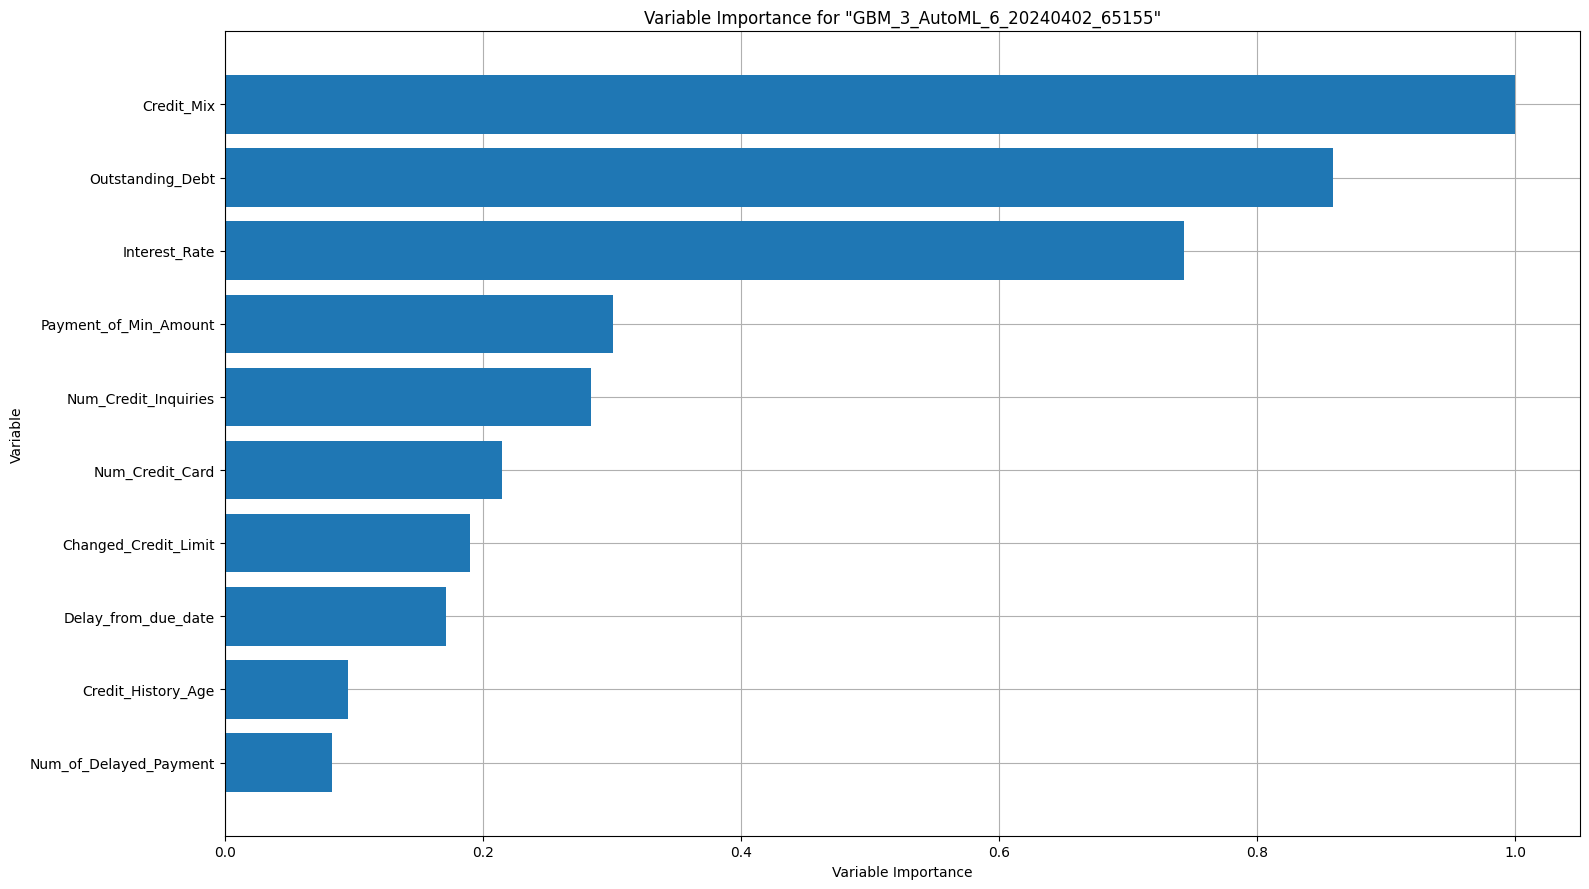

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

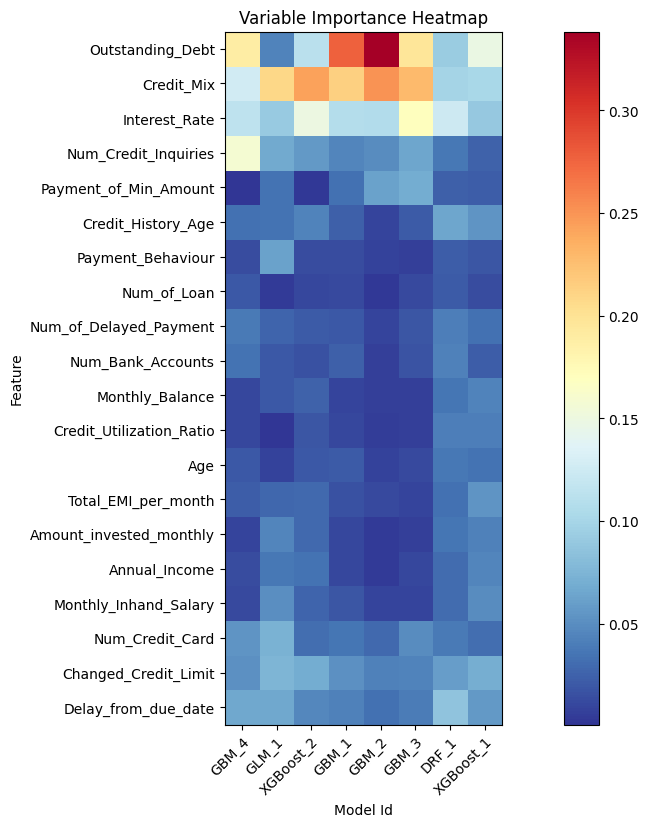

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ---------------
XGBoost_1_AutoML_6_20240402_65155                                     0.112209   0.317649  0.301562  0.0909398               10090                   0.020039  XGBoost
DRF_1_AutoML_6_20240402_65155                                         0.123219   0.963949  0.308274  0.095033                  698                   0.003995  DRF
StackedEnsemble_BestOfFamily_2_AutoML_6_20240402_65155                0.131648   0.400626  0.347111  0.120486                 5917                   0.028991  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_6_20240402_65155                   0.148541   0.412419  0.35661   0.127171                 7863                   0.060035  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_6_20240402_65155                0.16707    0.421057  0.361603  0.130757                11247                   0.041586  StackedEnsemble
XGBoost_2_AutoML_6_20240402_65155                                     0.216449   0.550773  0.426903  0.182246                 1452                   0.003603  XGBoost
GBM_1_AutoML_6_20240402_65155                                         0.234958   0.538671  0.422817  0.178774                 7247                   0.031059  GBM
GBM_4_AutoML_6_20240402_65155                                         0.246562   0.83426   0.563276  0.31728                   619                   0.003872  GBM
GBM_3_AutoML_6_20240402_65155                                         0.257181   0.805138  0.549154  0.30157                   592                   0.003824  GBM
GBM_2_AutoML_6_20240402_65155                                         0.262688   0.780782  0.537249  0.288636                  635                   0.00416   GBM
GLM_1_AutoML_6_20240402_65155                                         0.3583     0.718434  0.49293   0.24298                  6681                   0.000707  GLM
[11 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_6_20240402_65155

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Good    Poor    Standard    Error     Rate
------  ------  ----------  --------  --------------
2771    29      631         0.192364  660 / 3,431
75      6490    974         0.139143  1,049 / 7,539
444     1008    11272       0.114115  1,452 / 12,724
3290    7527    12877       0.133409  3,161 / 23,694

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

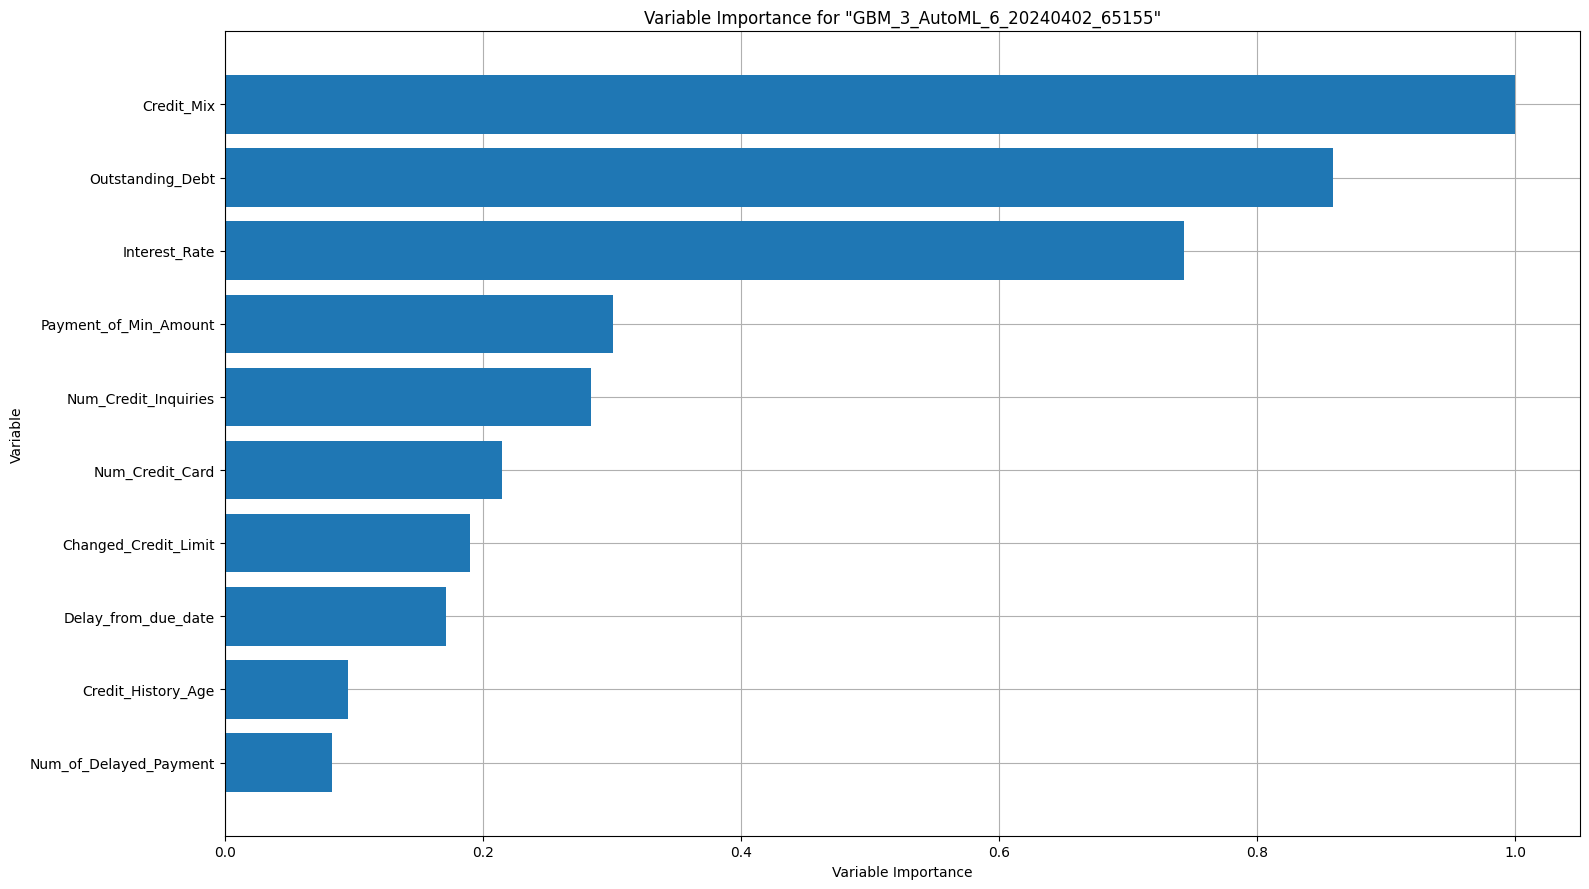

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

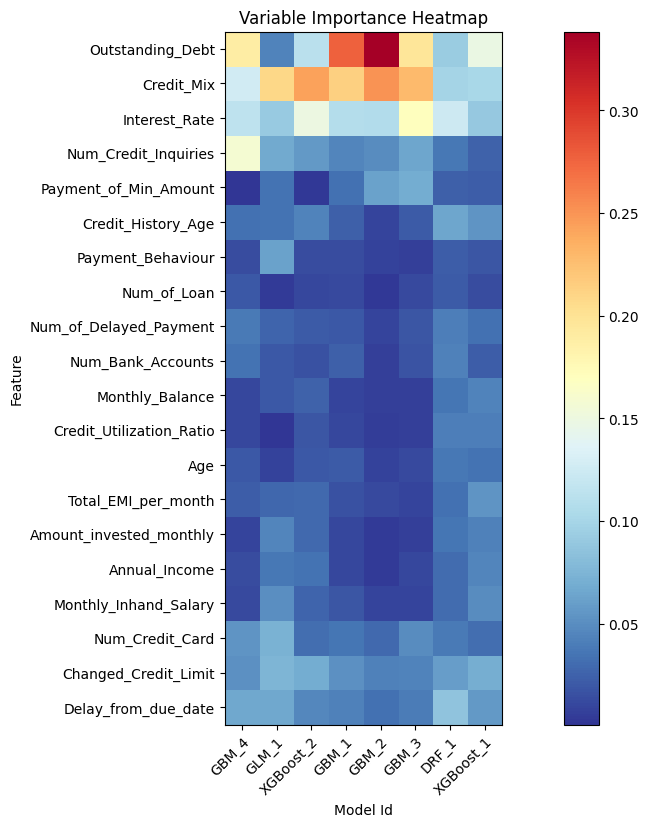

In [ ]:
aml.explain(h2o_df, include_explanations=["leaderboard", "confusion_matrix", "varimp", "varimp_heatmap"])

## SHAP Analysis

In [46]:
!pip install -q shap

import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.8 MB/s eta 0:00:00


#### Logistic Regression

In [ ]:
lr_explainer = shap.Explainer(lr_model, X_train, feature_perturbation='correlation_dependent')
lr_shap_values = lr_explainer.shap_values(X_test)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


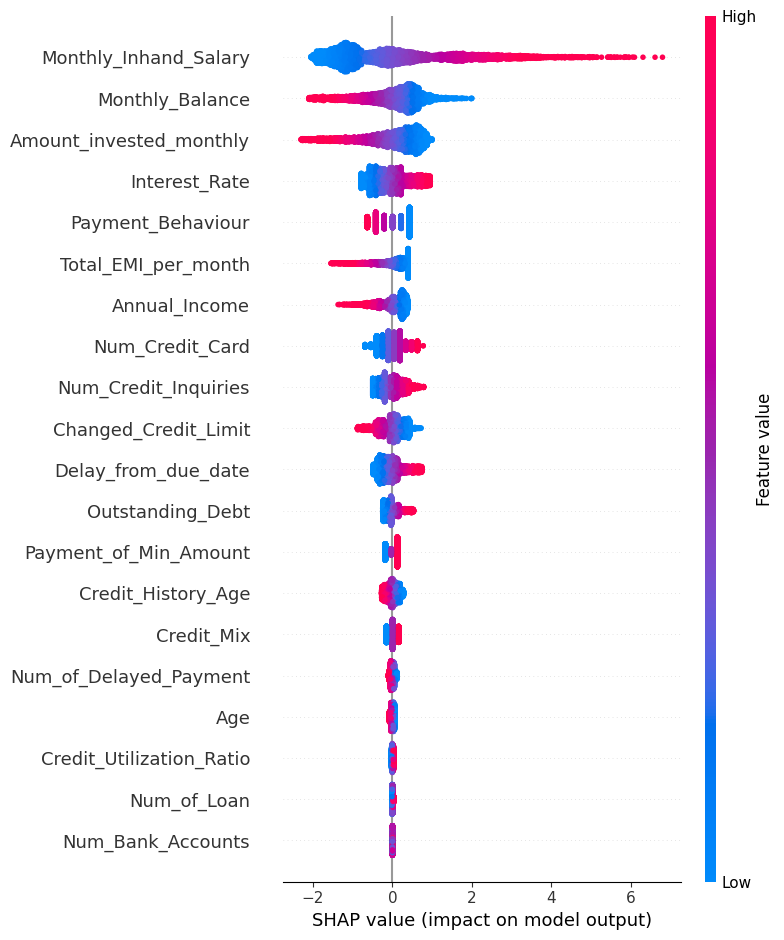

In [ ]:
shap.summary_plot(lr_shap_values[:,:,0], X_test)

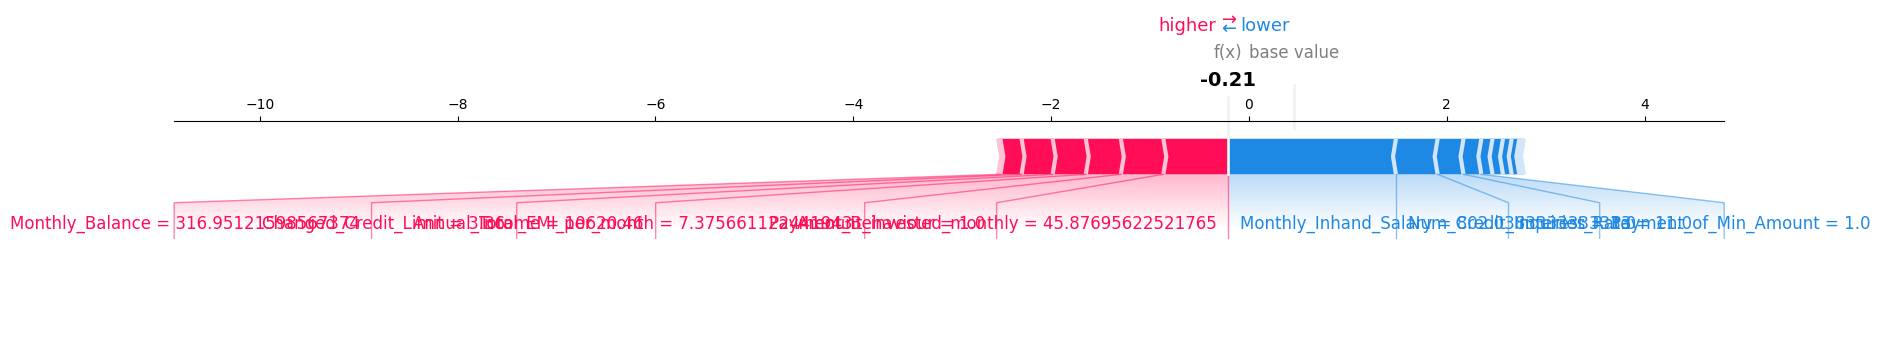

In [ ]:
shap.plots.force(lr_explainer.expected_value[0], lr_shap_values[0][:,0], X_test.iloc[0, :], matplotlib = True)

The SHAP summary plot for the logistic regression analysis of credit scores visually represents how individual features impact credit score predictions. Each point on the plot corresponds to a feature, and its color indicates the feature’s value (red for high, blue for low). SHAP values along the x-axis quantify each feature’s contribution: positive values enhance credit scores, while negative values detract from them. For instance, high positive SHAP values suggest features that contribute to good credit scores, while large negative values imply factors associated with poor credit scores. Features with large positive SHAP values have a strong positive influence on credit scores. Conversely, features with large negative SHAP values have a strong negative impact.For example, if a feature has a high positive SHAP value, it contributes significantly to a good credit score (class 2).Conversely, a feature with a large negative SHAP value might lead to a poor credit score (class 0).This plot provides valuable insights into creditworthiness determinants within the model.

#### Decision Tree

In [ ]:
dt_explainer = shap.TreeExplainer(dt_model)
dt_shap_values = dt_explainer.shap_values(X_test)

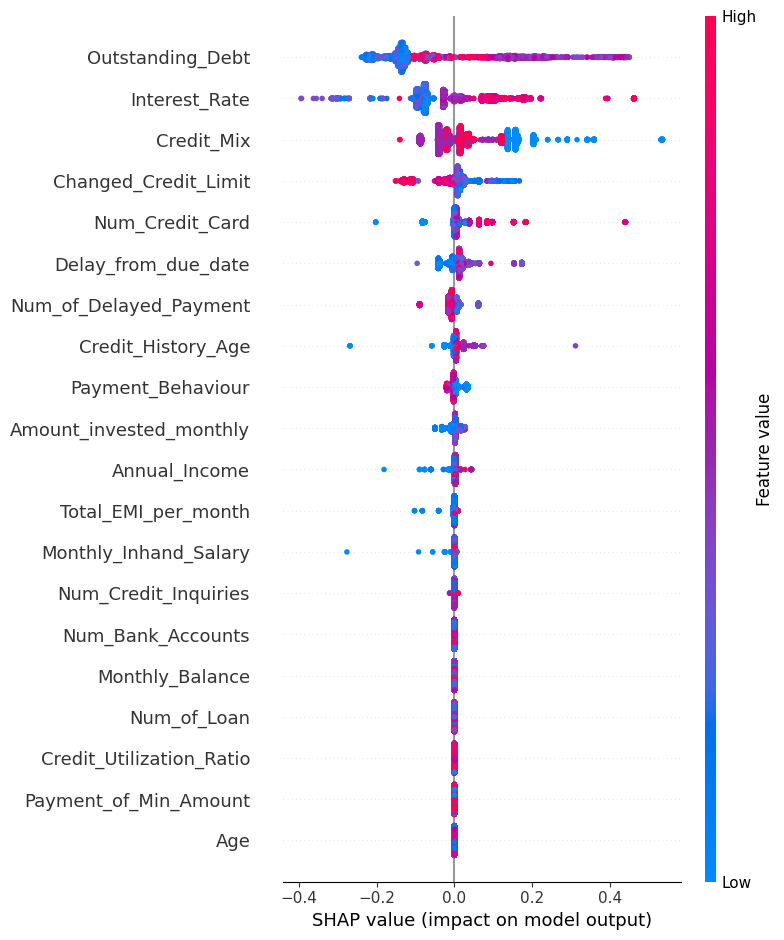

In [ ]:
shap.summary_plot(dt_shap_values[:,:,0], X_test)

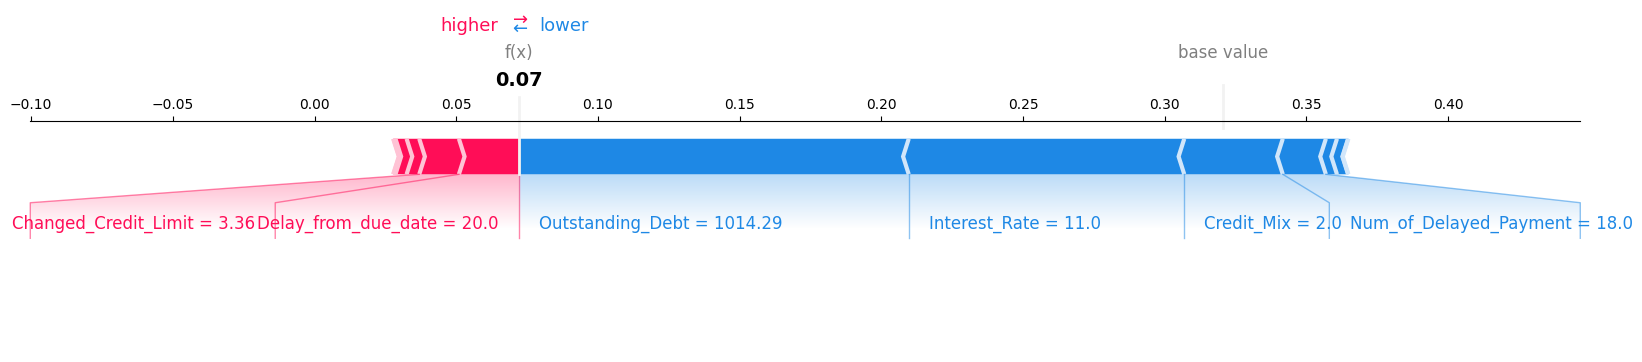

In [ ]:
shap.plots.force(dt_explainer.expected_value[0], dt_shap_values[0][:,0], X_test.iloc[0, :], matplotlib = True)


The SHAP values reveal the impact of various factors on credit scores. Positive values suggest features that positively influence scores, such as higher income and diverse credit mix, while negative values indicate factors like higher interest rates and credit utilization, which can lower scores. Timely payments and longer credit history positively impact creditworthiness, while excessive credit inquiries and high debt-to-income ratios have negative effects.

#### Auto ML

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

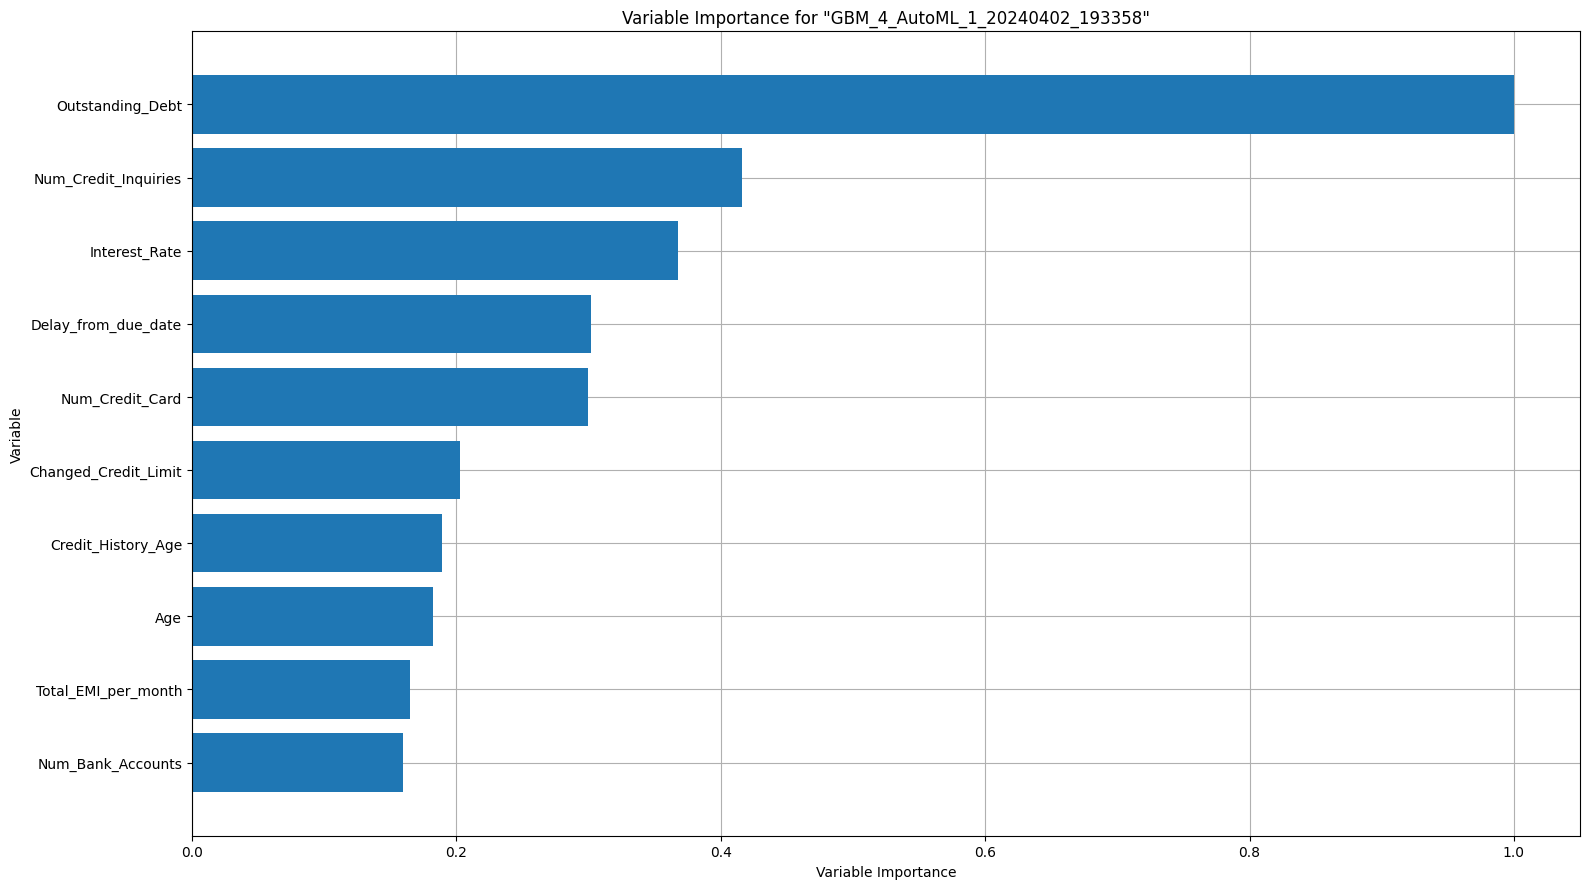

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

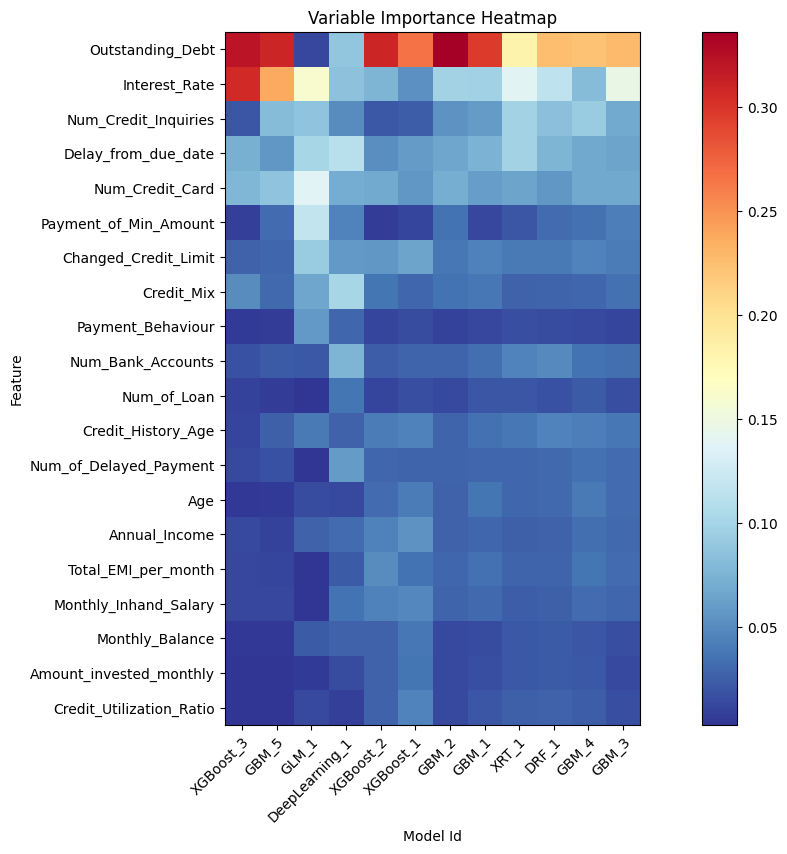

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

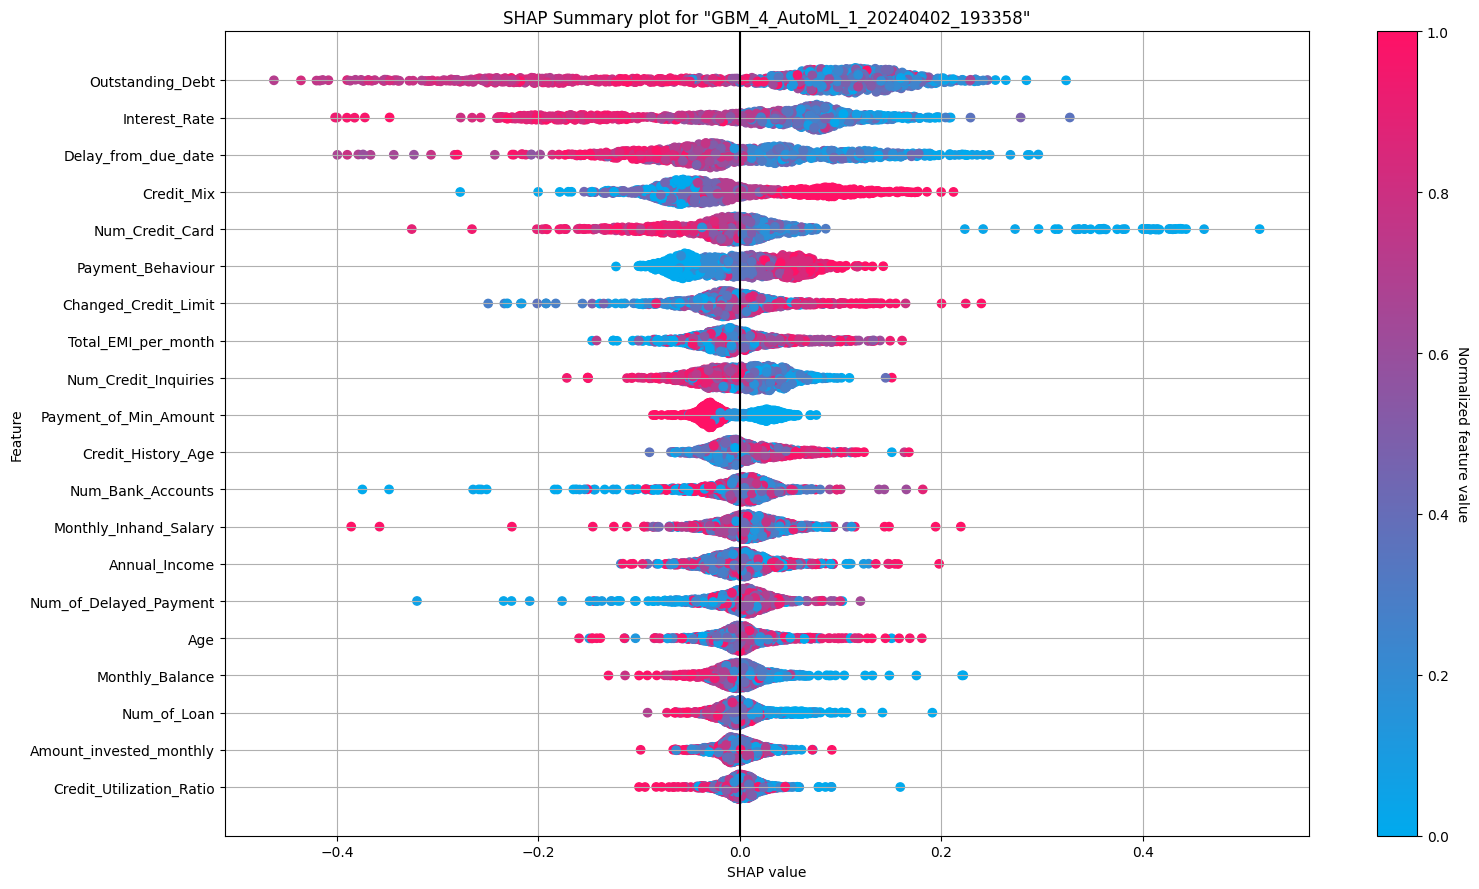

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

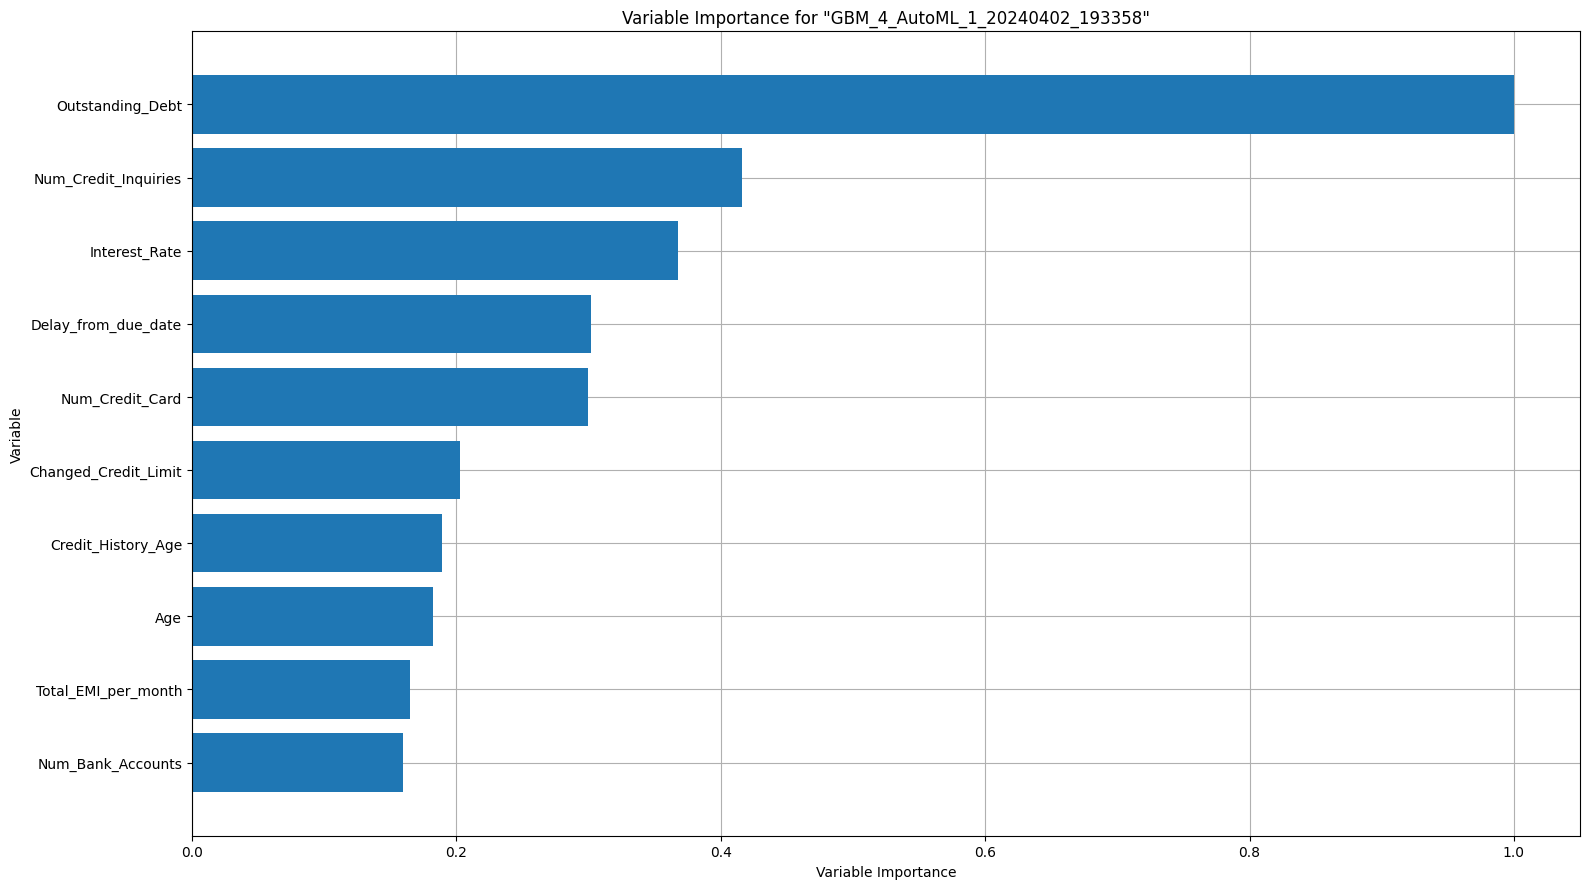

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

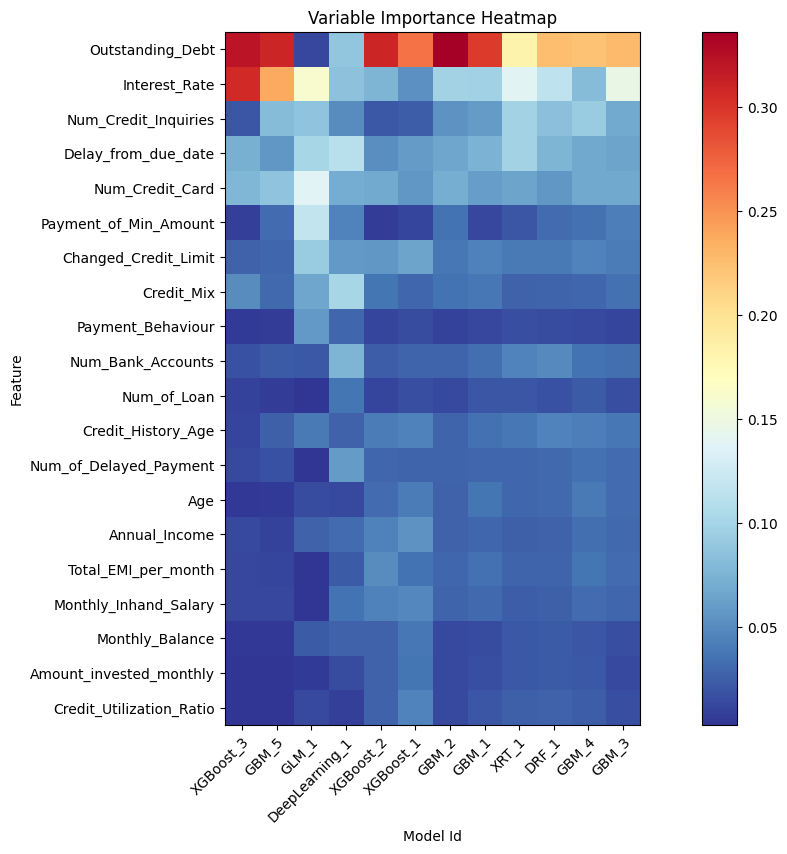

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

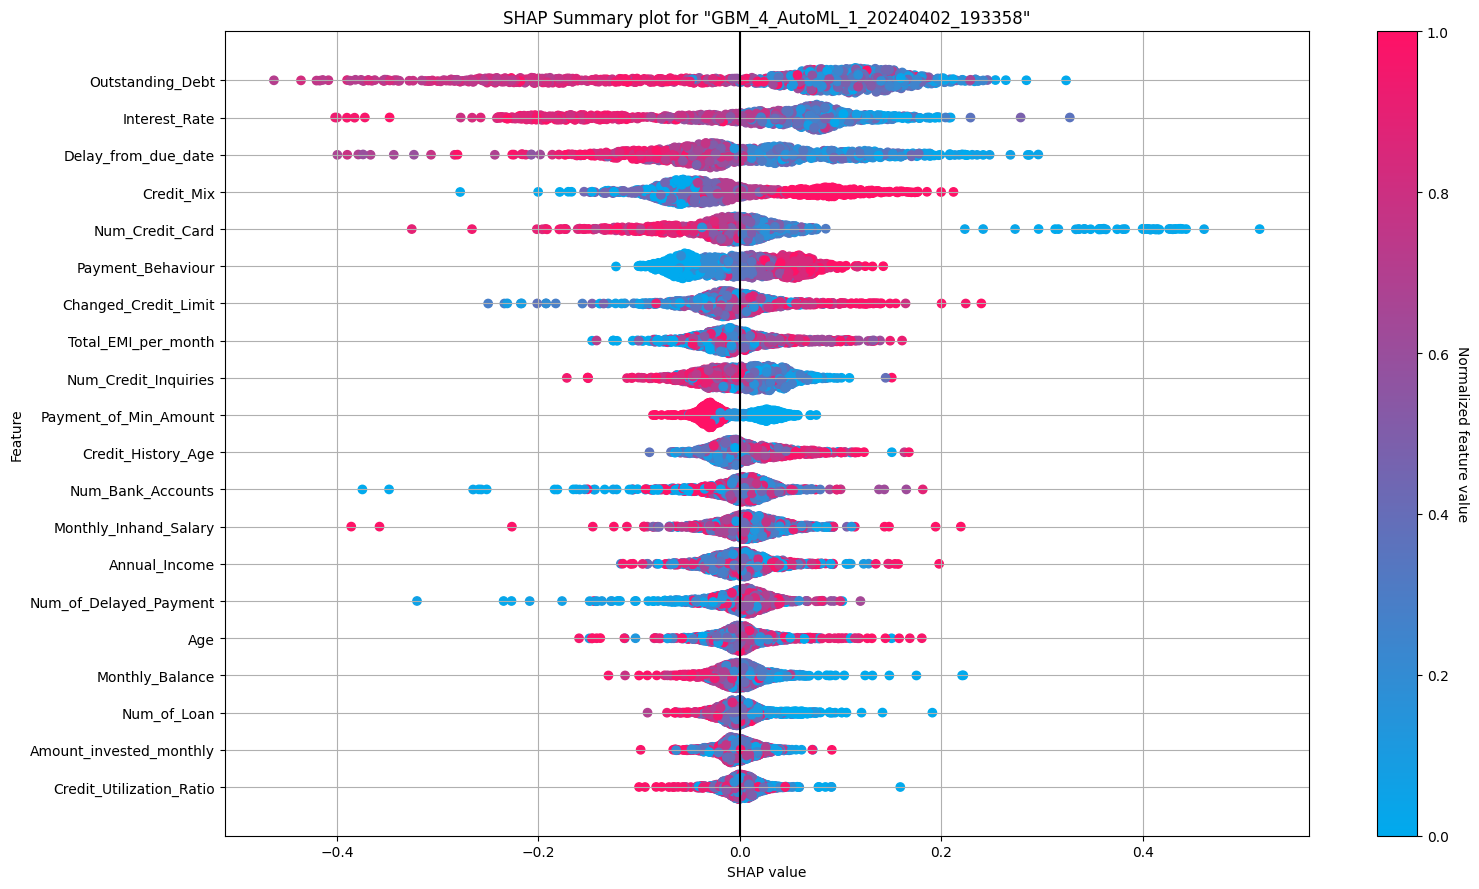

In [47]:
aml.explain(h2o_df, include_explanations=["varimp", "varimp_heatmap", "shap_summary"])

The Variable Importance Plot highlights Outstanding Debt, Interest Rate, and Credit Mix as crucial factors, suggesting a focus on managing debt and monitoring interest rates. The Correlation Heatmap reveals relationships like the positive correlation between Interest Rate and Outstanding Debt, guiding decisions on diversifying credit mix and rate monitoring. The SHAP Summary Plot illustrates feature impacts on individual predictions, emphasizing factors like Outstanding Debt and Annual Income for monitoring and management.

## LIME (Local Interpretation Model-Agnostic Explanation) Analysis

In [ ]:
!pip install -q lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
import lime
from lime import lime_tabular
import numpy as np

#### Linear Model

In [ ]:
# Initializing LIME explainer for Linear Model
lr_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [ ]:
lr_instance_idx = 0  # Choose an instance index from the test set
lr_instance = X_test.iloc[lr_instance_idx]
lr_exp = lr_linear_explainer.explain_instance(lr_instance.values, lr_model.predict_proba, num_features=len(X_train.columns))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", lr_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

Prediction :  [1]
Actual :      1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Instantiate LIME explainer for logistic regression
lime_lr_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Class 0', 'Class 1', 'Class 2'], discretize_continuous=True)


In [ ]:
# Explain the instance
lime_lr_explanation = lime_lr_explainer.explain_instance(
    np_x_test[idx], lr_model.predict_proba, num_features=np_x_test.shape[1]
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Display the explanation
lime_lr_explanation.show_in_notebook(show_table=True)

#### Decision Tree

In [ ]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", dt_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], dt_model.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

Prediction :  [1]
Actual :      1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Display the explanation
lime_tree_explanation.show_in_notebook()

Unlike LIME, SHAP does not necessarily build a local interpretable model but rather uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way, SHAP improves upon LIME due to its greater stability and lack of local linear model assumptions.

SHAP gives how much each variable contributes to the prediction LIME is more like SHAP but a lite version of it - It takes the local region of the point of interest and gives us information about the contribution each variable has made to the output We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model.

# **Conclusion**

In conclusion, the application of machine learning techniques, particularly in the context of credit score prediction, has shown significant strides in enhancing efficiency and accuracy within data analysis. Through the identification of key predictors and the mitigation of outliers, we have achieved improved predictive performance and gained valuable insights into creditworthiness assessment. Leveraging tools such as H2O AutoML has enabled the development of robust predictive models, allowing us to explore the impact of various regularization techniques on model performance. Additionally, the integration of interpretability methods like LIME and SHAP has provided valuable insights into the factors influencing credit score predictions, enhancing transparency and understanding. These findings emphasize the importance of a balanced approach in machine learning, which prioritizes both interpretability and accuracy, ensuring the creation of reliable and transparent credit scoring models tailored to specific business needs and regulatory requirements.

# **Questions**

**ML Data Cleaning and Feature Selection:**

- What is the question?

The main question was to prepare and analyze the data for machine learning, focusing on cleaning, exploring, and selecting features for predictive modeling.

- What did you do?

Conducted Exploratory Data Analysis (EDA) on both categorical and continuous variables.
Identified missing values and imputed them using KNN Imputer.
Plotted graphs for both dependent and independent variables to understand their likely distributions.
Analyzed important dependent variables using techniques like box plot, heat map, and feature correlation.
Calculated accuracy and confusion matrix using Random Forest Classifier.
Removed outliers at different percentages (1%, 5%, and 10%) and observed the impact on accuracy.

- How well did it work?

The data cleaning and feature selection process provided insights into the distribution of variables and helped in identifying important features for modeling. The evaluation using different classifiers and outlier removal also gave an understanding of model performance under different scenarios.

- What did you learn?

The importance of exploring and cleaning data before modeling.
The impact of outliers on model accuracy.
The effectiveness of different feature selection techniques.

**AutoML:**

- What is the question?

The question here was to explore and utilize AutoML for model training and selection.

- What did you do?

Applied H2O AutoML to the dataset.
Displayed and examined the Leaderboard to compare various models.
Compared and examined different models generated by AutoML.
Selected the best model based on performance.
Applied regularization techniques by annealing learning rate to the chosen model.

- How well did it work?

AutoML provided a quick and efficient way to explore multiple models and their performances.
The Leaderboard comparison and model examination allowed for an informed choice of the best-performing model.
Regularization was applied to enhance the chosen model's robustness.

- What did you learn?

The benefits of automated model selection and training.
The importance of regularization in model performance.

**Model Interpretability:**

- What is the question?

The question in this case was to interpret the chosen model and understand the impact of features.

- What did you do?

Fitted a tree-based model for interpretability.
Fitted a linear model for interpretability.
Used auto ml to find the best model.
Plotted a SHAP summary plot to interpret the model's behavior.

- How well did it work?

The tree-based model and SHAP values provided insights into feature importance and their impact on predictions.
The SHAP summary plot visually represented the contribution of each feature to the model's output.

- What did you learn?

The interpretability of machine learning models, especially through techniques like SHAP values.
How individual features contribute to the model's predictions.
These activities collectively demonstrate a comprehensive approach to data preparation, modeling, and interpretation in a machine learning project.

# **References**
- https://www.askpython.com/python/examples/detection-removal-outliers-in-python
- https://gist.github.com/dvjn/16581b60f082d716c37432053f58a903
- https://stackoverflow.com/a/41453817
- https://pandas.pydata.org/docs/
- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb
- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb
- https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
- https://docs.h2o.ai/

# **License**

License
MIT License

Copyright (c) 2024 Tanvi Inchanalkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

